<div id="toc_container" class="display-none">
    <p class="toc_title"><i class="fas fa-list"></i>Contents</p>
    <ul class="toc_list">
        <li><a href="#1.-Why-is-OLS-vulnerable-to-outliers?"><span class="toc_label">1.</span>
            Why is OLS vulnerable to outliers?</a></li>
        <ul>
            <li><a href="#1.1.-Convergence-to-mean"><span class="toc_label">1.1.</span>
                Convergence to mean</a></li>
            <li><a href="#1.2.-Squared-term-magnifies-impact-of-outliers"><span class="toc_label">1.2.</span>
                Squared term magnifies impact of outliers</a></li>
            <li><a href="#1.3.-Understanding-the-L-norms-in-cartesian-space"><span class="toc_label">1.3.</span>
                Understanding the L-norms in cartesian space</a></li>
        </ul>
        <li><a href="#2.-Robust-Models"><span class="toc_label">2.</span>
            Robust Models</a></li>
        <ul>
            <li><a href="#2.1.-RANSAC-regressor"><span class="toc_label">2.1.</span>
                RANSAC regressor</a></li>
                 <ul>
                    <li><a href="#2.1.1.-Visual-demonstrations"><span class="toc_label">2.1.1.</span>
                        Visual demonstrations</a></li>
                    <li><a href="#2.1.2.-Median-Absolute-Deviation-(MAD)-threshold"><span class="toc_label">2.1.2.</span>
                        Median Absolute Deviation (MAD) threshold</a></li>
                    <li><a href="#2.1.3.-Required-iteration-calculation"><span class="toc_label">2.1.3.</span>
                        Required iteration calculation</a></li>
                    <li><a href="#2.1.4.-More-detailed-visual-demonstrations"><span class="toc_label">2.1.4.</span>
                        More detailed visual demonstrations</a></li>
                    <li><a href="#2.1.5.-RANSAC-code-snippets"><span class="toc_label">2.1.5.</span>
                        RANSAC code snippets</a></li>
                </ul>
            <li><a href="#2.2.-Huber-regressor"><span class="toc_label">2.2.</span>
                Huber regressor</a></li>
                 <ul>
                    <li><a href="#2.2.1.-Huber-loss-function"><span class="toc_label">2.2.1.</span>
                        Huber loss function</a></li>
                    <li><a href="#2.2.2.-Motivation"><span class="toc_label">2.2.2.</span>
                        Motivation</a></li>
                    <li><a href="#2.2.3.-Parameter-tuning-($\delta$)"><span class="toc_label">2.2.3.</span>
                        Parameter tuning</a></li>
                    <li><a href="#2.2.4.-Huber-code-snippets"><span class="toc_label">2.2.4.</span>
                        Huber code snippets</a></li>
                </ul>
            <li><a href="#2.3.-Theil-Sen-regressor"><span class="toc_label">2.3.</span>
                Theil-Sen regressor</a></li>
                 <ul>
                    <li><a href="#2.3.1.-Sample-size-and-model-robustness"><span class="toc_label">2.3.1.</span>
                        Sample size and model robustness</a></li>
                    <li><a href="#2.3.2.-Spatial-median"><span class="toc_label">2.3.2.</span>
                        Spatial median</a></li>
                    <li><a href="#2.3.3.-Why-use-median-instead-of-mean-with-outliers?"><span class="toc_label">2.3.3.</span>
                        Why use median instead of mean with outliers?</a></li>
                     <ul>
                        <li><a href="#2.3.3.1.-Effect-of-the-squared-term"><span class="toc_label">2.3.3.1.</span>
                            Effect of the squared term</a></li>
                        <li><a href="#2.3.3.2.-Measure-of-central-tendency"><span class="toc_label">2.3.3.2.</span>
                            Measure of central tendency</a></li>
                    </ul>
                    <li><a href="#2.3.4.-Theil-Sen-code-snippets"><span class="toc_label">2.3.4.</span>
                        Theil-Sen code snippets</a></li>
                </ul>
            <li><a href="#2.4.-Summary"><span class="toc_label">2.4.</span>
                Summary</a></li>
        </ul>
        <li><a href="#3.-Extension-to-3D+-multivariate-linear-regressions"><span class="toc_label">3.</span>
            Extension to 3D+ multivariate linear regressions</a></li>
        <ul><li><a href="#3.1.-Visual-demonstrations"><span class="toc_label">3.1.</span>
            Visual demonstrations</a></li>
        </ul>
    </ul>
</div>

In regression analysis, understanding and mitigating the impact of outliers is crucial for accurate model predictions. Common approaches like Ordinary Least Squares (OLS) often fall short when outliers are present, leading to skewed results. This discussion will explore how various regression techniques, including OLS, RANSAC, Huber, and Theil-Sen regressors, each handle outliers differently. By examining these methods through both theoretical insights and practical demonstrations using Python, I aim to highlight their unique responses to outlier influences, thereby guiding the selection of the most appropriate regression model for datasets with varying outlier characteristics.

<div id="fig-1" class="row full_screen_margin_90 mobile_responsive_plot_full_width" style="">
<div class="col"><img src="jupyter_images/robust linear regression comprisons.png"></div>
</div>
<div class="col-12 fig-title"><p class="image-description"><strong>Figure 1:</strong> In scenarios involving outliers, the RANSAC regressor is often the preferred choice as it identifies and excludes outliers before fitting the model. Other robust regressors, like Huber and Theil-Sen, aim to <i>dampen</i> the impact of outliers rather than exclude them. This approach is beneficial if the so-called 'outliers' are actually integral parts of the dataset, needing consideration rather than exclusion. In terms of robustness to outliers, the hierarchy typically follows: RANSAC > Theil-Sen > Huber > OLS. Note that the points labeled with the 'x' markers are outliers detected by the RANSAC model.</p></div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (1)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import RANSACRegressor, HuberRegressor, TheilSenRegressor

###################################### data ######################################

X = np.array([ 0.15, -0.34, 0.32, 0.43, -0.4, -0.04, -0.51, 0.3, 0.47, 0.12, 0.08, 0.04, -0.08,
              -0.23, 0.08, -0.03, 0.03, 0.04, 0.01, 0.06, 0.03, 0., -0.04, -0.18, -0.19, -0.06,
              -0.26, -0.16, 0.13, 0.09, 0.03, -0.03, 0.04, 0.14, -0.01, 0.4, -0.06, 0.15, 0.08,
              0.05, -0.15, -0.09, -0.15, -0.11, -0.07, -0.19, -0.06, 0.17, 0.23, 0.18]).reshape(-1, 1)
y = np.array([17.44, 25.46, 18.61, 26.07, 24.96, -1.22, 26.45, 26.5, 20.57, 3.08, 35.9 , 32.47,
              20.84, 13.37, 42.44, 27.23, 35.65, 29.51, 31.28, 41.34, 32.19, 33.67, 25.64, 9.3,
              14.63, 25.1, 4.69, 14.42, 47.53, 33.82, 32.2 , 24.81, 32.64, 45.11, 26.76, 68.01,
              23.39, 43.49, 37.88, 36.01, 16.32, 19.77, 16.34, 19.57, 29.28, 16.62, 24.39, 43.77,
              50.46, 47.09])

################################### Model fits ###################################

# Ordinary Least Squares
ols = linear_model.LinearRegression().fit(X, y)
y_pred_ols = ols.predict(X)
coefs_ols = ols.coef_
intercept_ols = ols.intercept_

# RANSAC
ransac = RANSACRegressor(random_state=1).fit(X, y)
y_pred_ransac = ransac.predict(X)
coefs_ransac = ransac.estimator_.coef_
intercept_ransac = ransac.estimator_.intercept_

# Huber
huber = HuberRegressor().fit(X, y)
y_pred_huber = huber.predict(X)
coefs_huber = huber.coef_
intercept_huber = huber.intercept_

# TheilSen
TS = TheilSenRegressor().fit(X, y)
y_pred_TS = TS.predict(X)
coefs_TS = TS.coef_
intercept_TS = TS.intercept_

########################## Outliers detected - RANSAC ############################

X_outlier_ransac = X[~ransac.inlier_mask_ ]
y_outlier_ransac = y[~ransac.inlier_mask_ ]

#################################### Plotting ####################################

fig, ax = plt.subplots(figsize=(8, 4.5))

ax.scatter(X_outlier_ransac, y_outlier_ransac, s=100, c='#ff7f0e', marker='x')
ax.scatter(X, y, s=100, fc='grey', lw=1, edgecolors='k', alpha=0.3)
ax.plot(X, y_pred_ols, label='OLS')
ax.plot(X, y_pred_ransac, label='RANSAC')
ax.plot(X, y_pred_huber, label='Huber')
ax.plot(X, y_pred_TS, label='TheilSen')

ax.legend(fontsize=12, ncol=4)

ax.grid(axis='y', linestyle='--', color='#acacac', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('X', fontsize=13)
ax.set_ylabel('y', fontsize=13)
ax.text(0.99, 0.1, 'aegis4048.github.io', fontsize=12, ha='right', va='center',
    transform=ax.transAxes, color='grey', alpha=0.5)

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Robust Linear Regression')
plain_txt = r', performance comprisons of OLS vs. robust models'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=13, y=0.96)
yloc = 0.88
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

fig.tight_layout()
            </code>
        </pre>
    </div>
</div>

## 1. Why is OLS vulnerable to outliers?

A simple 2D Ordinary Least Squares (OLS) solves for arguments (slope $m$ and intercept $b$) that minimize the following objective (loss) function:

<div id="eq-1" style="font-size: 1rem;">
$$L_{2}^{2} = \underset{m, b}{\text{argmin}} \sum_{i=1}^n [y_i - (mx_i + b)]^2 \tag{1}$$
</div>

Intuitively the objective function is finding the best slope and intercept that will minimize the **squared** prediction error (residuals) of your model prediction $\hat{y} = mX + b$ against the observation $y$. <a href="#eq-1" class="internal-link">Eq-1</a> is often referred to as *$L_{2}$-Norm squared*. It has some interesting properties that make it vulnerable to the outliers:

<div><hr></div>


<div id="The equation converges to mean, and inherits the statistical properties of mean"></div>

### 1.1. Convergence to mean

The equation has mathematical properties that make it converge to mean. While I'm not gonna bore the readers explaining the mathematical proof (I don't understand them anyway), I can show you in Python that it indeed converges to the mean. Consider the following code snippet:

In [1]:
import numpy as np
from scipy.optimize import minimize

# Implemenation of eq-1 above
def L2_norm_squared(point, _x):
    return np.sum((_x - point[0])**2)

x = np.array([3, 9, 21, 25])
x0 = 0   # initial guess, this can be anything

L2 = minimize(L2_norm_squared, x0, args=(x), method='Nelder-Mead')

print("L2-squared minimized:", L2.x)
print("Mean of x:", [np.mean(x)])

L2-squared minimized: [14.5]
Mean of x: [14.5]


<div style='margin-top: -15px;'></div>

Observe that the parameter <code>14.5</code>, which minimizes the objective function, is also the sample mean. This is because the objective function converges towards the mean. However, the problem with the mean is that it's not the best measure of central tendency in the presence of outliers that induce skewness. Consider the below figure:

<div id="fig-2" class="row full_screen_margin_60 mobile_responsive_plot_full_width" style="">
<div class="col"><img src="jupyter_images/mean - median - mode - outliers.png"></div>
</div>
<div class="col-12 fig-title"><p class="image-description"><strong>Figure 2:</strong> Three measures of central tendency in presence of outliers: mode, median and mean (image adpated from <a href="https://www.researchgate.net/publication/10633674_Comparison_of_mode_estimation_methods_and_application_in_molecular_clock_analysis" target="_blank">here).</a></p></div>

In an ideal normal distribution without outliers, the mode, median, and mean coincide. However, outliers skew the distribution, pulling the mean away from where most data points lie. The median, less affected by outliers, provides a better measure of central tendency in such cases, leading to the preference for median-based estimators like the*$L_{1}$-Norm* absolute loss over squared loss. <a href="#fig-18" class="internal-link">Figures 18 and 19</a> below shows visual demonstrations of superior performance of median-based estimators in presence of outliers. 

<div id="Because the residuals are squared, large outliers disproportionately affects model fit"></div>

### 1.2. Squared term magnifies impact of outliers

The OLS loss function aims to minimize the squared residuals, which escalates the influence of outliers because the <u>loss increases exponentially with larger residuals</u>. This can lead to a poor fit. Less severe loss functions, like the regular *$L_{2}$-Norm* (square root of sum of squared residuals):

<div id="eq-2" style="font-size: 1rem;">
$$L_2 = \underset{m, b}{\text{argmin}} \sqrt{\sum_{i=1}^n [y_i - (mx_i + b)]^2} \tag{2}$$
</div>

or *$L_{1}$-Norm* (absolute residuals): 

<div id="eq-3" style="font-size: 1rem;">
$$L_1 = \underset{m, b}{\text{argmin}} \sum_{i=1}^n |y_i - (mx_i + b)| \tag{3}$$
</div>

can be more resilient to outliers, dampening their effects. <a href="#eq-2" class="internal-link">Eq-2</a> has the squared term, but the effect of squaring is mitigated by taking the squared root, making it more robust than *$L_{2}$-Norm squared* . <a href="#eq-3" class="internal-link">Eq-3</a> on the other hand, has no squared term at all, making it the most robust choice among the three.

<div><hr></div>

<div id="Understanding the L-norms in cartesian space"></div>

### 1.3. Understanding the L-norms in cartesian space

Interesting observations arise when the norms are adapted in a Cartesian space, and these can be used to illustrate why the OLS is vulnerable to outliers. Consider four data points in a 2D Cartesian space along the x-axis and y-axis. Minimizing the *$L_{2}$-Norm squared* (<a href="#eq-1" class="internal-link">eq-1</a>, which is the objective function of the OLS) for the distance from these four points identifies the centroid (center of mass) coordinate that minimizes the sum of the squares of distances to each point. This point, having the smallest average distance to each of the four points, can be found through a simple formula: its x and y coordinates are the averages of the x's and y's of the four points, respectively. This is possible because the *$L_{2}$-Norm squared* has the mathematical property of converging to the mean, as demonstrated <a href="#The equation converges to mean, and inherits the statistical properties of mean" class="internal-link">above.</a>

On the other hand, minimizing the *$L_{2}$-Norm* <a href="#eq-2" class="internal-link">eq-2</a> identifies a point that minimizes the sum of <a href="https://en.wikipedia.org/wiki/Euclidean_distance" target="_blank">Euclidean distances</a> to each point, known as the <a href="https://en.wikipedia.org/wiki/Geometric_median" target="_blank">spatial (geometric) median.</a> Note that the *$L_{2}$-Norm* essentially generalizes the Pythagorean theorem for n-dimensional spaces.

(Minimizing the *$L_{1}$-Norm* absolute loss <a href="#eq-3" class="internal-link">eq-3</a> reduces the <a href="https://en.wikipedia.org/wiki/Taxicab_geometry" target="_blank">Manhattan distances</a> from all points, a process without any specific Cartesian property associated with it)

<a href="#fig-3" class="internal-link">Figure 3</a> below demonstrates how outliers affect the mean (centroid, *$L_{2}$-Norm squared*) compared to the median (spatial median, *$L_{2}$-Norm*). When an outlier with an extreme y-value is introduced, it shifts the mean upwards more significantly than the median. This difference arises because the median's objective function computes the square root of squared residuals, thereby reducing the impact of squared errors and assigning less weight to this outlier than the mean-based estimator. Given that such outliers are typically undesirable in regression model fitting, methods that either mitigate (like <a href="#Theil-Sen regressor" class="internal-link">Theil-Sen</a> and <a href="#Huber regressor" class="internal-link">Huber</a> regressors) or eliminate (like the <a href="#RANSAC regressor" class="internal-link">RANSAC</a> regressor) the influence of these outliers are preferred.


<div id="fig-3" class="row" style="">
<div class="col"><img src="jupyter_images/mean vs median - effects of outliers.png"></div>
<div class="col-12"><p class="image-description"><strong>Figure 3:</strong> The graph illustrates the robustness of median-based estimators compared to mean-based estimators in the presence of outliers. The lef plot shows a dataset without outliers. The mean (green plus) represents the centroid (a point that minimizes the average distances) of the four points and the median (orange star) shows the spatial median (a point that minimizes the sum of Euclidean distances). On the right, the introduction of an outlier (marked with a red 'x') significantly shifts the mean upwards, whereas the median remains relatively stable, highlighting its robustness. This contrast is due to the squared error in the mean calculation magnifying the effect of outliers, whereas the median—equivalent to the square root of the squared error—dampens their impact, thus remaining more stable in their presence.</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (3)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

x = [3, 9, 21, 25]
y = [12, 35, 16, 28]

x_outlier = [3, 9, 15, 21, 25]
y_outlier =[12, 35, 100, 16, 28]

ys = [y, y_outlier]
xs = [x, x_outlier]

# L2 loss - euclidean distance
def L2_objective_func(point, _x, _y):
    return np.sum(np.sqrt((point[0] - _x)**2 + (point[1] - _y)**2))

# L2 squared loss
def L2_squared_objective_func(point, _x, _y):
    return np.sum((_x - point[0])**2 + (_y - point[1])**2)

s = 150
init_guess = [0, 0]

fig, axes = plt.subplots(1, 2, figsize=(9, 4))
for i, (ax, x, y) in enumerate(zip(axes, xs, ys)):
    
    # calculates L2 euclidean loss. This results in a spatial median
    result_L2 = minimize(L2_objective_func, init_guess, args=(x, y), method='Nelder-Mead')

    # calculatse L2 squared loss. This results in a centroid (center of mass)
    result_L2_2 = minimize(L2_squared_objective_func, init_guess, args=(x, y), method='Nelder-Mead')
    
    # Proves that minimizing L2 squared loss results in mean
    assert np.allclose(result_L2_2.x, [np.mean(x), np.mean(y)], atol=1e-4)

    ax.scatter(x, y, s=s, edgecolor='blue', fc=(0, 0, 1, 0.05))
    _s1 = ax.scatter(result_L2.x[0], result_L2.x[1], s=s, 
                     label=r'Median:  $\underset{x, y}{\mathrm{argmin}} \sum^{n}_{i=1}\sqrt{(x_{i} - \hat{x}_{i})^{2} + (y_{i} - \hat{y}_{i})^2}$', marker='*')
    _s2 = ax.scatter(result_L2_2.x[0], result_L2_2.x[1], s=s, 
                     label=r'Mean:  $\underset{x, y}{\mathrm{argmin}} \sum^{n}_{i=1}[(x_{i} - \hat{x}_{i})^{2} + (y_{i} - \hat{y}_{i})^2]$', marker='+', lw=3)
    
    xmax = 30
    ymax = 110
    ax.set_xlim(0 - 0.05 * xmax, xmax)
    ax.set_ylim(0 - 0.05 * ymax, ymax)

    ax.grid(axis='both', linestyle='--', color='#acacac', alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if i == 0:
        x_increment = 1.2
    else:
        x_increment = 1.5
    
    ax.text(result_L2_2.x[0] - x_increment, result_L2_2.x[1] + 6, '(%d, %d)' % (result_L2_2.x[0], result_L2_2.x[1]), color=_s2.get_facecolor()[0], ha='center')
    ax.text(result_L2.x[0] + x_increment, result_L2.x[1] + 6, '(%d, %d)' % (result_L2.x[0], result_L2.x[1]), color=_s1.get_facecolor()[0], ha='center')
    ax.text(0.98, 0.08, 'aegis4048.github.io', fontsize=10, ha='right', transform=ax.transAxes, color='grey', alpha=0.5)
    
    ax.text(result_L2_2.x[0] - x_increment, result_L2_2.x[1] + 14, 'Mean', color=_s2.get_facecolor()[0], ha='center')
    ax.text(result_L2.x[0] + x_increment, result_L2.x[1] + 14, 'Median', color=_s1.get_facecolor()[0], ha='center')

    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    
axes[1].scatter(x[2], y_outlier[2], s=100, marker='x')
axes[1].text(x[2], y_outlier[2] - 10, 'outlier', color='red', ha='center')


handles, labels = [], []
for ax in axes:
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
    break
fig.legend(handles, labels, fontsize=10.5, ncol=2, loc='lower center', bbox_to_anchor=(0.5, -0.14), frameon=True)

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Mean vs Median, ')
plain_txt = r'effect of outliers on median- vs mean-based estimators'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=12, y=0.96)
yloc = 1.035
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

fig.tight_layout()
            </code>
        </pre>
    </div>
</div>

## 2. Robust Models

<div id="RANSAC regressor"></div>

### 2.1. RANSAC regressor

**RAN**dom **SA**mple **C**onsensus (RANSAC) is an iterative algorithm that separates inliers vs. outliers, and fits a regression model only using the separated inliers. 

<div><hr></div>
<div id="RANSAC Steps"></div>

*(Note that these steps are based on <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html" target=_blank>sklearn's implementation of RANSAC regressor.</a>)*

<div class="ordered-list">
    <h2>Steps</h2>
    <ol>
        <li>Start the 1st iteration. Randomly select $m$ (<code>min_samples</code>) data points from the whole data set. $m$ = number of features + 1. Therefore, for 2D linear regression, $m=2$. No duplicates.</li>
        <li>Fit a linear regression model on the selected $m$ data points. The objective function being minimized is the <i>$L_{1}$-Norm</i> absolute loss <a href="#eq-3" class="internal-link">eq-3</a> (<code>loss='absolute_error</code> by default. Alternatively you could try <code>loss='squared_error'</code>). When $m=2$, the slope generalizes to a simple $(y_{j}−y_{i})/(x_{j}−x_{i})$.</li>
        <li>Classify a point as an inlier if it falls within a certain threshold value (<code>residual_threshold</code>) from the fitted regression line. By default, the threshold is the <a href="#Advanced: Mean Absolute Deviation (MAD) threshold" class="internal-link">Median Absolute Deviation (MAD)</a> (auto-computed) of the whole data. Repeat this for every data point in the original data set. </li>
        <li>Compute the value of $N$ (<a href="#Advanced: Required iteration ($k$) calculation" class="internal-link">required number of iterations</a>). </li>
        <li>Start the 2nd iteration. Repeat steps 1-4.</li>
        <li>If the newly fitted model from the 2nd iteration contains more inliers, replace the previous model with the new one. Otherwise keep the old model from the 1st iteration. If both the old and new models have the same number of inliers, pick the one with a better $R^2$ score.</li>
        <li>Compare the old and new $N$ values, and pick a smaller one: <code>min(old_N, new_N)</code></li>
        <li>Repeat steps 1-7 until the $N$-th iteration. $N$ can be indirectly controlled by tweaking <code>stop_probability</code> and <code>min_samples</code> arguments. </li>
        <li>Iterations are finished. Fit a new regression model using only the final inliers. Return the fitted model.</li>
    </ol>
</div>

<div id="Visual demonstrations"></div>

#### 2.1.1. Visual demonstrations

<div class="row" style="margin-top: 0px;" id="fig-4">
<div class="col"><img src="jupyter_images/ransac_1.png"></div>
</div>

<div class="row" style="margin-top: 0px;">
<div class="col"><img src="jupyter_images/ransac_2.png"></div>
</div>

<div class="row" style="margin-top: 0px;">
<div class="col"><img src="jupyter_images/ransac_3.png"></div>
</div>
<div class="col-12"><p class="image-description"><strong>Figure 4:</strong> Simplified visual demonstration of RANSAC algorithm $m=2$ (<code>min_samples=2</code>).</p></div>
</div>

<div><hr></div>

<div id="Advanced: Mean Absolute Deviation (MAD) threshold"></div>

#### 2.1.2. Median Absolute Deviation (MAD) threshold

The default threshold for RANSAC employs the Median Absolute Deviation (MAD), a value calculated once before the iterative process begins. Just as how the standard deviation serves as a measure of spread around the mean, MAD represents variability around the median. This choice is motivated by the robustness of the median over the mean as a measure of central tendency as explained <a href="#The equation converges to mean, and inherits the statistical properties of mean" class="internal-link">above</a>. 

MAD can be computed with the following codes:

In [5]:
import numpy as np

X = np.array([3,  6, 9, 10, 12, 15, 17, 18, 20, 24, 25, 26, 27]).reshape(-1, 1)
y = np.array([8, 12, 15.5, 13.5, 17, 20, 18, 24, 24.5, 8, 6, 9, 7])

MAD = np.median(np.abs(y - np.median(y)))
MAD

5.5

<div id="fig-5" class="row" style="margin-top: -15px;">
<div class="col"><img src="jupyter_images/MAD-gumbel.png"></div>
<div class="col-12"><p class="image-description"><strong>Figure 5:</strong> Median Absolute Deviation (MAD) is a measure centered around the median, akin to how the standard deviation ($\pm\sigma$) around the mean in a normal distribution encompasses 68.2% of the population. Importantly, the median provides a more accurate representation of central tendency in the presence of skewness or outliers, compared to the mean.</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (5)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
        <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r, iqr


data = gumbel_r.rvs(size=100000, random_state=1)
x = np.linspace(min(data), max(data), 100000)
pdf = gumbel_r.pdf(x)

M = np.median(data)
MAD = np.median(np.abs(data - M))
Mean = np.mean(data)

perc_left = gumbel_r.cdf(M - MAD)
perc_right = 1 - gumbel_r.cdf(M + MAD)
perc_center = 1 - perc_left - perc_right

def y_finder(y_arr, x_arr, x_val, idx_increment=0):
    idx = np.argmin(np.abs(np.array(x_arr) - x_val))
    return y_arr[idx + idx_increment]

fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(x, pdf, 'k-', lw=2, zorder=99)

ax.fill_between(x, pdf, where=((x >= M - MAD) & (x <= M + MAD)), color='skyblue', alpha=0.3)
ax.vlines(x=M - MAD, ymax=y_finder(pdf, x, M - MAD), ymin=0, ls='--')
ax.vlines(x=M + MAD, ymax=y_finder(pdf, x, M + MAD), ymin=0, ls='--')
ax.vlines(x=M, ymax=y_finder(pdf, x, M), ymin=0, color='r', ls='--')

ax.text(M - MAD - 0.1, 0.01, '%.1f%s' % (perc_left * 100, r'%'), ha='right', va='bottom')
ax.text(M + MAD + 0.1, 0.01, '%.1f%s' % (perc_right * 100, r'%'), ha='left', va='bottom')
ax.text(M, 0.15, '%.1f%s' % (perc_center * 100, r'%'), ha='center', va='center', fontsize=20)
ax.text(M - MAD - 0.1, y_finder(pdf, x, M - MAD), 'Median-MAD', ha='right', va='center', color='#1f77b4', fontsize=13)
ax.text(M + MAD + 0.1, y_finder(pdf, x, M + MAD), 'Median+MAD', ha='left', va='center', color='#1f77b4', fontsize=13)
ax.text(M + 0.1, y_finder(pdf, x, M), 'Median', ha='left', va='center', color='r', fontsize=13)
ax.text(0.01, 0.15, 'aegis4048.github.io', fontsize=10, ha='left', transform=ax.transAxes, color='grey', alpha=0.5)

ax.set_ylim(0, None)
ax.set_xlim(-2.5, 6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Mean Absolute Deviation (MAD), ')
plain_txt = r'measure of central tendency using median; Gumbel distribution'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=11, y=0.95)
yloc = 0.85
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

fig.tight_layout()     
            </code>
        </pre>
    </div>
</div>

<div id="Advanced: Required iteration ($k$) calculation" style="margin-top: -15px;"></div>

#### 2.1.3. Required iteration calculation

Another important component of the RANSAC is the required iteration ($N$).

<div id="eq-4" style="font-size: 1rem;">
$$ N >= \frac{log(1-p)}{log(1-e^m)} \tag{4}$$
</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-2">$N$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">required number of iterations.</div>
    </div>
    <div class="row">
        <div class="col-2">$p$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">probability (confidence) that one outlier-free sample is generated. (default=0.99). </div>
    </div>    
    <div class="row">
        <div class="col-2">$e$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">inlier ratio (# of inliers / # of entire data points). This may change every iteration.</div>
    </div>
    <div class="row">
        <div class="col-2">$m$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">minimum number of samples chosen randomly from origianl data (default=2).</div>
    </div>    
</div>

$N$ is rounded up to the nearest integer. Note that you can *indirectly* control the value of $N$ by changing <code>stop_probability</code> and <code>min_samples</code> in the sklearn package. It can be computed with the following codes:

In [6]:
import numpy as np

p = 0.99       # sklearn default
m = 2          # sklearn default for 2D linear regression
w = 0.6        # this may change every iteration

N = abs(float(np.ceil(np.log(1 - p) / np.log(1 - w ** m))))
N

11.0

<div><hr></div>

<div id="More detailed visual demonstrations"></div>

#### 2.1.4. More detailed visual demonstrations

<div class="row" style="margin-top: 15px;" id="fig-6">
<div class="col"><img src="jupyter_images/ransac_advanced_1st.png"></div>
    <div class="col-12"><p class="image-description"><strong>Figure 6:</strong> First iteration in RANSAC. Left plot shows randomly selected 2 data points (blue dots) for regression. The right plot displays residuals, with the dashed red line indicating MAD. Points with residuals exceeding MAD are marked as outliers. Initially, $N$ is set to 100 <code>max_trials=100</code>. After the first iteration, $N$ is computed to be 20 using <a href="#eq-4" class="internal-link">eq-4</a>. Since 20 is smaller than 100, $N$ is updated to 20.  A total of 6 inliers are found in this round.</p></div>
</div>

<div class="row" style="margin-top: 15px;" id="fig-7">
<div class="col"><img src="jupyter_images/ransac_advanced_2nd.png"></div>
<div class="col-12"><p class="image-description"><strong>Figure 7:</strong> Second iteration. The new model has more inliers (9) then the previous model (6). Model is updated. The inlier ratio ($w$ in <a href="#eq-4" class="internal-link">eq-4</a>) changes. $N$ is computed to be 8 in this iteration. Since 8 is smaller than 20 from the previous iteration, $N$ is updated to 8.</p></div>
</div>

<div class="row" style="margin-top: 15px;" id="fig-8">
<div class="col"><img src="jupyter_images/ransac_advanced_3rd.png"></div>
<div class="col-12"><p class="image-description"><strong>Figure 8:</strong> Third iteration. Although the number of inliers equals the previous iteration, a visual inspection of the left plot reveals that the current model is incorrect. To decide whether an update is necessary, we compare the $R^2$ scores. Since the previous model has a higher $R^2$ (0.92) than the current one (0.62), no model update is performed. This process continues until the $N$-th (8th) iteration, assuming that $N$ remains constant. Once all iterations are completed, the final model is fitted using the selected inliers.</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figures (6-8)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
            
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import RANSACRegressor

X = np.array([3,  6, 9, 10, 12, 15, 17, 18, 20, 24, 25, 26, 27]).reshape(-1, 1)
y = np.array([8, 12, 15.5, 13.5, 17, 20, 18, 24, 24.5, 8, 6, 9, 7])
MAD = np.median(np.abs(y - np.median(y)))

N_PREV = 100

def fit_and_plot(X, y, MAD, random_state, selected_idx, stage, update_status):
    
    global N_PREV

    X_selected = X[selected_idx]
    y_selected = y[selected_idx]

    ols = linear_model.LinearRegression()
    model = ols.fit(X_selected, y_selected)
    y_pred = model.predict(X)
    residuals = np.abs(y - y_pred)

    ransac = RANSACRegressor(max_trials=1, random_state=random_state).fit(X, y) # deal with rs=11
    y_pred_ransac = ransac.predict(X)
    num_inliers = np.sum(ransac.inlier_mask_)
    R2 = ransac.score(X[ransac.inlier_mask_], y[ransac.inlier_mask_])

    p = 0.99
    m = 2
    w = num_inliers / len(y)
    N = abs(float(np.ceil(np.ceil(np.log(1 - p) / np.log(1 - w ** m)))))

    ####################################################################################

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    axes[0].scatter(X, y, s=100, color='#70ad47', label='Inliers')
    axes[0].scatter(X[~ransac.inlier_mask_], y[~ransac.inlier_mask_], s=100, color='red', label='Outliers')
    axes[0].scatter(X_selected, y_selected, s=100, color='#4472c4', label='Random')

    axes[0].axline(xy1=(X_selected[0][0], y_selected[0]), xy2=(X_selected[-1][0], y_selected[-1]), color='#7030a0', label='Regression on Random')
    axes[0].legend(loc='upper left', ncol=2, fontsize=9)
    axes[0].set_title('RANSAC: %s iteration' % stage, fontsize=10)

    scatter_dict = {'s':100, 'fc':'none', 'linewidth':1.5}
    axes[1].scatter(X[ransac.inlier_mask_], residuals[ransac.inlier_mask_], edgecolors='k', label='Inliers', **scatter_dict)
    axes[1].scatter(X[~ransac.inlier_mask_], residuals[~ransac.inlier_mask_], edgecolors='r', label='Outliers', **scatter_dict)
    axes[1].scatter(X[selected_idx], residuals[selected_idx], edgecolors='b', label='Random', **scatter_dict)
    
    axes[1].axhline(y=MAD, color='r', linestyle='--')
    axes[1].legend(loc='upper left', ncol=3, fontsize=9)
    axes[1].text(-0.5, MAD + 0.5, 'Threshold (MAD) = 5.50', fontsize=9, ha='left', va='bottom', color='r', alpha=1)
    axes[1].text(0, 25, '# of Inliers = %d' % num_inliers, ha='left', weight='bold', fontsize=12)
    axes[1].text(0, 22.75, update_status, ha='left', fontsize=10)
    axes[1].text(0, 20.5, 'min($N_{old}$, $N_{new}$)= min(%d, %d)= %d' % (N_PREV, N, N), ha='left', fontsize=10)
    axes[1].text(0, 18.25, '$R^2$ = %.2f' % round(R2, 2), ha='left', fontsize=10)
    axes[1].set_title('Residuals of regression', fontsize=10)

    xmax = 30
    ymax = 30
    for ax in axes:
        ax.spines.top.set_visible(False)
        ax.spines.right.set_visible(False)
        ax.set_xlim(0 - 0.05 * xmax, xmax + 0.05 * xmax)
        ax.set_ylim(0 - 0.05 * ymax, ymax + 0.05 * ymax)
        
    N_PREV = N
    
fit_and_plot(X, y, MAD, random_state=3, selected_idx=[4, 6], stage='1st', update_status='model updated (initial)')
fit_and_plot(X, y, MAD, random_state=11, selected_idx=[0, 6], stage='2nd', update_status='model updated')
fit_and_plot(X, y, MAD, random_state=29, selected_idx=[-9, -1], stage='3rd', update_status='model NOT updated')
            </code>
        </pre>
    </div>
</div>

<div id="RANSAC code snippets" style="margin-top: -15px;"></div>

#### 2.1.5. RANSAC code snippets

For quick copy-paste, replace <code>X</code> and <code>y</code> with your own data. Make sure to reshape your <code>X</code> so that it is a 2D <code>numpy.ndarray</code> object with shape like <code>(13, 1)</code>.

RANSAC -----------------------------------

Coefficients         : [92.50723098]
Intercept            : 30.331391269710938
# of inliers         : 40
Fraction of inliers  : 0.8

------------------------------------------


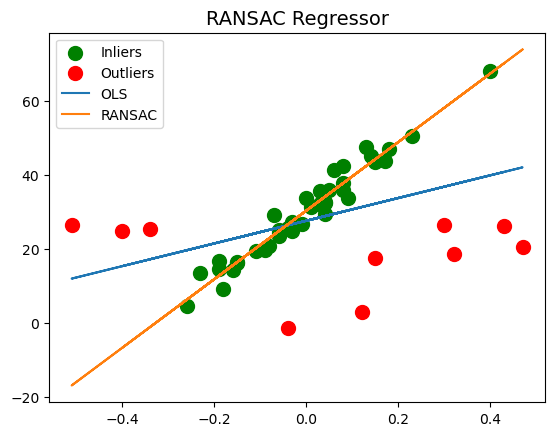

In [7]:
import numpy as np
from sklearn.linear_model import RANSACRegressor
from sklearn import linear_model
import matplotlib.pyplot as plt

# sample data
X = np.array([ 0.15, -0.34, 0.32, 0.43, -0.4, -0.04, -0.51, 0.3, 0.47, 0.12, 0.08, 0.04, -0.08, 
              -0.23, 0.08, -0.03, 0.03, 0.04, 0.01, 0.06, 0.03, 0., -0.04, -0.18, -0.19, -0.06, 
              -0.26, -0.16, 0.13, 0.09, 0.03, -0.03, 0.04, 0.14, -0.01, 0.4, -0.06, 0.15, 0.08, 
              0.05, -0.15, -0.09, -0.15, -0.11, -0.07, -0.19, -0.06, 0.17, 0.23, 0.18]).reshape(-1, 1)
y = np.array([17.44, 25.46, 18.61, 26.07, 24.96, -1.22, 26.45, 26.5, 20.57, 3.08, 35.9 , 32.47, 
              20.84, 13.37, 42.44, 27.23, 35.65, 29.51, 31.28, 41.34, 32.19, 33.67, 25.64, 9.3, 
              14.63, 25.1, 4.69, 14.42, 47.53, 33.82, 32.2 , 24.81, 32.64, 45.11, 26.76, 68.01, 
              23.39, 43.49, 37.88, 36.01, 16.32, 19.77, 16.34, 19.57, 29.28, 16.62, 24.39, 43.77, 
              50.46, 47.09])

# fit and predict: RANSAC
ransac = RANSACRegressor(random_state=1).fit(X, y)      
y_pred_ransac = ransac.predict(X)

# retrieve the fitted parameters
coefs = ransac.estimator_.coef_              # RANSAC fits many regression models. The ".estimator_" attribute
intercept = ransac.estimator_.intercept_     # has the final model fitted. 

# seperate into inliers vs. outliers
X_inlier = X[ransac.inlier_mask_ ]
y_inlier = y[ransac.inlier_mask_ ]
X_outlier = X[~ransac.inlier_mask_ ]
y_outlier = y[~ransac.inlier_mask_ ]

print("RANSAC -----------------------------------\n")
print("Coefficients         :", coefs)
print("Intercept            :", intercept)
print("# of inliers         :", sum(ransac.inlier_mask_))
print("Fraction of inliers  :", sum(ransac.inlier_mask_) / len(y))
print("\n------------------------------------------")

# fit and predict: Ordinary Least Squares
ols = linear_model.LinearRegression().fit(X, y)
y_pred_ols = ols.predict(X)

# plot
plt.title('RANSAC Regressor', fontsize=14)
plt.scatter(X_inlier, y_inlier, s=100, c='green', label='Inliers')
plt.scatter(X_outlier, y_outlier, s=100, c='red', label='Outliers')
plt.plot(X, y_pred_ols, label='OLS')
plt.plot(X, y_pred_ransac, label='RANSAC')
plt.legend();

<div class="highlights red-theme" id="warning-RANSAC">
    <div class="highlights-title red-theme">WARNING!</div>
    <div class="highlights-content red-theme">RANSAC relies on random sampling, which means that with a larger dataset (exceeding 50 points), your regression outcomes can differ due to this inherent randomness. This approach offers the advantage of flexibility for iterative adjustments (as observed when running the same code multiple times without a fixed random seed) when turning the model. However, it also leads to variability in outcomes, which can be problematic for replicating results or sharing code. To achieve consistent results when you are done tuning and trying to report, it's advisable to set a random seed, as in: <code>model = RANSACRegressor(random_state=3)</code>.
    </div>
</div>

<div id="Huber regressor"></div>

### 2.2. Huber regressor

The Huber regressor doesn't eliminate outliers but mitigates their effect, making it a preferred choice when you have reason to believe that so-called outliers may have relevance in the regression analysis. In contrast to other robust regression techniques like RANSAC or Theil-Sen, which involve substantial structural modifications in their algorithms compared to default linear regression, such as subsampling and fitting regressions on these subsets, the Huber regressor differes only in its choice of loss function while retaining the fundamental structure of default linear regression.

<div><hr></div>

<div id="Huber loss function"></div>

#### 2.2.1. Huber loss function

The original Huber loss is a piece-wise function shown in <a href="#eq-5" class="internal-link">eq-5</a>. This is the most generic search result you will see if you google Huber regressor. Note that the term, $y - \hat{y}$, are often referred to as residuals (prediction error).

<div id="eq-5" style="font-size: 1rem;">
$$ L_{\delta} (y - \hat{y})=   \left\{
    \begin{array}{ll}
          \frac{1}{2}(y - \hat{y})^{2} & \text{for } |y - \hat{y}| \leq \delta \text{ (inlier)},  \\
          \delta \cdot (|y - \hat{y}| - \frac{1}{2}\delta) &  \text{otherwise (outlier)}.  \\
    \end{array} 
    \right.  
    \tag{5}$$
</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-2">$y$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">observation, original data point</div>
    </div>
    <div class="row">
        <div class="col-2">$\hat{y}$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">prediction</div>
    </div>
    <div class="row">
        <div class="col-2">$\delta$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">absolute parameter that controls the number of outliers</div>
    </div>    
    <div class="row">
        <div class="col-2">$L$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">loss function</div>
    </div>    
</div>

HOWEVER, a challenge with the equation <a href="#eq-5" class="internal-link">eq-5</a> is that the $\delta$ parameter is in absolute scale. For instance, if 95% of your residuals fall within the range of (45, 60), setting $\delta=1.35$ equates to a 2.25% to 3.00% residual tolerance, which works well. But when dealing with a different dataset where the residuals range from (4355, 13205), applying the same $\delta=1.35$ results in an impractical ~0.001% residual tolerance. Therefore, a unique $\delta$ value would be needed for each dataset's residual range. To address this, scikit-learn modifies the original Huber loss by using the scale parameter $\sigma$, allowing for a consistent threshold parameter that operates on a <i>relative</i> scale instead of an absolute one.

The loss function that <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn.linear_model.HuberRegressor" target=_blank>HuberRegressor</a> minimizes is given by:

<div id="eq-6" style="font-size: 1rem;">
$$
\begin{align}
     \underset{w, \sigma}{\text{argmin}}\left[\sum^{n}_{i=1}\left(\sigma + L_{\epsilon}\left(\frac{X_{i}w - y_{i}}{\sigma}\right)\sigma\right) + \alpha ||w||_{2}^{2}\right]
     \tag{6}
\end{align}
$$</div>

where

<div id="eq-7" style="font-size: 1rem;">
$$ L_{\epsilon}(z)=   \left\{
    \begin{array}{ll}
          z^{2} & \text{for } z \leq \epsilon \text{ (inlier)},  \\
          2\epsilon |z| - \epsilon^{2} &  \text{otherwise (outlier)}.  \\
    \end{array} 
    \right.  
    \tag{7}$$
</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-2">$w$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">linear regression arguments. For 2D liear regression, it's (slope, intercept)</div>
    </div>
    <div class="row">
        <div class="col-2">$\sigma$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">scaling parameter. This allows the residual threshold to be on a relative scale so it can work for all residual ranges.</div>
    </div>
    <div class="row">
        <div class="col-2">$i$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">index of a data point</div>
    </div>    
    <div class="row">
        <div class="col-2">$n$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">number of samples.</div>
    </div>
    <div class="row">
        <div class="col-2">$L$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">Huber loss function</div>
    </div>    
    <div class="row">
        <div class="col-2">$\epsilon$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">relative <code>epsilon</code> parameter that controls the number of outliers.</div>
    </div>
    <div class="row">
        <div class="col-2">$X$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">independent variable. Note that $X_{i}w$ is equivalent to prediction $\hat{y}_{i}$</div>
    </div> 
    <div class="row">
        <div class="col-2">$y$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">observation, original data point</div>
    </div>        
    <div class="row">
        <div class="col-2">$\alpha$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">learning rate</div>
    </div>    
    <div class="row">
        <div class="col-2">$z$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">residual divided by $\sigma$</div>
    </div>        
</div>

The loss function maybe a bit challenging to interpret for beginners. <a href="#fig-9" class="internal-link">Figure 9</a> below shows how the equation breaks down. Recall that $L_{\epsilon}$ is a piece-wise function that applies different formula depending on whether the data point is identified as an outlier or not by the $\epsilon$ parameter, which is set to be 1.35 (recommended) by scikit learn.

<div class="row" style="" id="fig-9">
<div class="col"><img src="jupyter_images/huber explained.png"></div>
<div class="col-12"><p class="image-description"><strong>Figure 9:</strong> Explanation of <a href="#eq-9" class="internal-link">eq-9</a>.</p></div>
</div>

<div><hr></div>

<div id="Motivation"></div>

#### 2.2.2. Motivation

The two most commonly used loss functions are squared loss, $L(y - \hat{y}) = (y - \hat{y})^2$ and absolute loss, $L(y - \hat{y}) = |y - \hat{y}|$. While the squared loss is more accurate, it has the disadvantage that it has the tendency to be dominated by outliers. This susceptibility arises because squared residuals magnify the effect of outliers, as the residuals are squared, leading to an exponential increase in loss as residuals grow. In contrast, absolute loss grows linearly with residuals, rendering it more robust to outliers.

The Huber regressor offers a compelling compromise, leveraging the strengths of squared and absolute loss functions while mitigating their weaknesses. It employs squared loss for small-residual data points (inliers) and absolute loss for large-residual data points (outliers). The distinction between inliers and outliers is governed by the $\delta$ parameter, set to 1.35 by default in scikit-learn.

<div id="Parameter tuning"></div>

#### 2.2.3. Parameter tuning ($\delta$)

The $\delta$ parameter controls the residual threshold for determining whether squared loss or Huber loss is applied. As shown in <a href="#fig-10" class="internal-link">Figure 10</a>, smaller $\delta$ values lead to a more robust approach by applying Huber loss to a greater number of data points, emphasizing absolute loss. Conversely, larger $\delta$ values result in squared loss being more prevalent, making the method more susceptible to outliers. Notably, for very large $\delta$ values, Huber loss converges to squared loss (susceptible to outliers), as described in <a href="#eq-8" class="internal-link">eq-8</a>:


<div id="eq-8" style="font-size: 1rem;">
$$ \lim_{\delta\to \infty}: \text{Huber Loss} \approx \text{Squared Loss} \tag{8}$$
</div>

Note that in the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html" target=_blank>scikit-learn implementation</a>, the residuals are divided by the scale parameter sigma <code>|(y - Xw - c) / sigma|</code> to ensure that one does not need to rescale epsilon to achieve the same robustness. The default value of $\delta$ in scikit-learn is 1.35.

<div class="row" style="margin-top: 15px;" id="fig-10">
<div class="col"><img src="jupyter_images/huber loss effect of delta.png"></div>
<div class="col-12"><p class="image-description"><strong>Figure 10:</strong> $\delta$ controls the residual thresholds used to determine whether to compute squared loss or Huber loss. Small value of $\delta$ (left plot) allows Huber loss to be applied for wider residual ranges of data, making it more robust to outliers. Observe that the blue line (Huber Loss) in the left plot applies to greater residual ranges with smaller $\delta$(=1.35).</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (10)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
import numpy as np
import matplotlib.pyplot as plt


error_range = np.linspace(-3.3, 3.3, 100)
theta_values = [1.35, 2.35]

huber_color = 'blue'
squared_color = 'green'
fig, axes = plt.subplots(1, len(theta_values), figsize=(9, 4.5))

for i, theta in enumerate(theta_values):
    huber_loss = np.where(np.abs(error_range) <= theta, 0.5 * error_range ** 2, theta * (np.abs(error_range) - 0.5 * theta))
    squared_error_loss = 0.5 * error_range ** 2

    ax = axes[i]

    # Set the range for which the line styles and alphas will change
    x_range = (-theta, theta)

    # Plot Huber Loss line
    huber_loss_segment = np.where((error_range >= x_range[0]) & (error_range <= x_range[1]), huber_loss, np.nan)
    ax.plot(error_range, huber_loss_segment, linewidth=2, zorder=3, alpha=0.3, linestyle='dashed', color=huber_color)
    huber_loss_segment = np.where((error_range < x_range[0]) | (error_range > x_range[1]), huber_loss, np.nan)
    ax.plot(error_range, huber_loss_segment, label='Huber Loss', linewidth=2, zorder=3, alpha=1, linestyle='-', color=huber_color)

    # Plot Squared Loss line
    squared_loss_segment = np.where((error_range >= x_range[0]) & (error_range <= x_range[1]), squared_error_loss, np.nan)
    ax.plot(error_range, squared_loss_segment, label='Squared Loss', linewidth=2, zorder=3, alpha=1, linestyle='-', color=squared_color)
    squared_loss_segment = np.where((error_range < x_range[0]) | (error_range > x_range[1]), squared_error_loss, np.nan)
    ax.plot(error_range, squared_loss_segment, linewidth=2, zorder=3, alpha=0.3, linestyle='dashed', color=squared_color)
    
    # Fill the area between the axvlines
    fill_alpha = 0.03
    ax.axvspan(-5, -theta, alpha=fill_alpha, color=huber_color, zorder=-8, label='Outliers')
    ax.axvspan(theta, 5, alpha=fill_alpha, color=huber_color, zorder=-9)
    ax.axvspan(-theta, theta, alpha=fill_alpha, color=squared_color, zorder=-9, label='Inliers')
    
    ax.set_xlabel('Residuals ($y - \\hat{y}$)', fontsize=13)
    ax.set_ylabel('Loss', fontsize=13)
    ax.grid(True, alpha=0.3)
    
    lg = ax.legend(loc='upper center', ncol=2)
    for i, lh in enumerate(lg.legendHandles):
        if i > 1:
            lh.set_alpha(0.4)
    
    ax.axvline(x=theta, color='r', linestyle="dotted", alpha=0.7)
    ax.axvline(x=-theta, color='r', linestyle="dotted", alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(-3.3, 3.3)

    ax.text(0, 3.5, '$\delta = %.2f$' % theta,
            fontsize=13, ha='center', va='top', color='r', alpha=0.7, rotation=0)
    ax.text(0.05, 0.1, 'aegis4048.github.io', fontsize=10, ha='left', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
    
    
axes[0].text(3, 0.1, 'more robust', ha='right', fontsize=13, bbox=dict( facecolor='white'))
axes[1].text(3, 0.1, 'less robust', ha='right', fontsize=13, bbox=dict( facecolor='white'))

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])   

bold_txt = setbold('Huber Loss, ')
plain_txt = r'effect of $\delta$-parameter on inlier vs. outlier detection'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=11)
yloc = 0.9
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

fig.tight_layout()
            </code>
        </pre>
    </div>
</div>

<div id="Huber code snippets" style="margin-top: -15px"></div>

#### 2.2.4. Huber code snippets

For quick copy-paste, replace <code>X</code> and <code>y</code> with your own data. Make sure to reshape your <code>X</code> so that it is a 2D <code>numpy.ndarray</code> object with shape like <code>(13, 1)</code>.

Huber -----------------------------------

Coefficients         : [50.32948547]
Intercept            : 29.03041669256188
# of inliers         : 31
Fraction of inliers  : 0.62

------------------------------------------


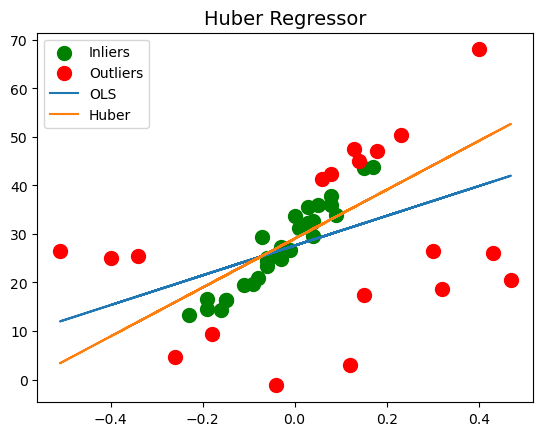

In [8]:
import numpy as np
from sklearn.linear_model import HuberRegressor
from sklearn import linear_model
import matplotlib.pyplot as plt

# sample data
X = np.array([ 0.15, -0.34, 0.32, 0.43, -0.4, -0.04, -0.51, 0.3, 0.47, 0.12, 0.08, 0.04, -0.08, 
              -0.23, 0.08, -0.03, 0.03, 0.04, 0.01, 0.06, 0.03, 0., -0.04, -0.18, -0.19, -0.06, 
              -0.26, -0.16, 0.13, 0.09, 0.03, -0.03, 0.04, 0.14, -0.01, 0.4, -0.06, 0.15, 0.08, 
              0.05, -0.15, -0.09, -0.15, -0.11, -0.07, -0.19, -0.06, 0.17, 0.23, 0.18]).reshape(-1, 1)
y = np.array([17.44, 25.46, 18.61, 26.07, 24.96, -1.22, 26.45, 26.5, 20.57, 3.08, 35.9 , 32.47, 
              20.84, 13.37, 42.44, 27.23, 35.65, 29.51, 31.28, 41.34, 32.19, 33.67, 25.64, 9.3, 
              14.63, 25.1, 4.69, 14.42, 47.53, 33.82, 32.2 , 24.81, 32.64, 45.11, 26.76, 68.01, 
              23.39, 43.49, 37.88, 36.01, 16.32, 19.77, 16.34, 19.57, 29.28, 16.62, 24.39, 43.77, 
              50.46, 47.09])

# fit and predict: Huber 
huber = HuberRegressor(epsilon=1.35).fit(X, y)   # 1.35 is the default. You can try different epsilon values.
y_pred_huber = huber.predict(X)

# retrieve the fitted parameters
coefs = huber.coef_
intercept = huber.intercept_

# seperate into inliers vs. outliers
X_inlier = X[~huber.outliers_]
y_inlier = y[~huber.outliers_]
X_outlier = X[huber.outliers_]
y_outlier = y[huber.outliers_]

print("Huber -----------------------------------\n")
print("Coefficients         :", coefs)
print("Intercept            :", intercept)
print("# of inliers         :", sum(~huber.outliers_))
print("Fraction of inliers  :", sum(~huber.outliers_) / len(y))
print("\n------------------------------------------")

# fit and predict: Ordinary Least Squares
ols = linear_model.LinearRegression().fit(X, y)
y_pred_ols = ols.predict(X)

# plot
plt.title('Huber Regressor', fontsize=14)
plt.scatter(X_inlier, y_inlier, s=100, c='green', label='Inliers')
plt.scatter(X_outlier, y_outlier, s=100, c='red', label='Outliers')
plt.plot(X, y_pred_ols, label='OLS')
plt.plot(X, y_pred_huber, label='Huber')
plt.legend();

<div class="highlights red-theme" id="huber-warning">
    <div class="highlights-title red-theme">WARNING!</div>
    <div class="highlights-content red-theme">Despite the application of the robust Huber regressor, the regression fit in the plot above (Figure ?) is still notably influenced by the presence of outliers, albeit to a lesser extent. This influence persists because, instead of completely excluding outliers during the fitting process, Huber aims to attenuate their impact by employing absolute loss rather than squared loss. Therefore, unless there is a compelling reason to retain and account for the so-called "outliers" within your data, using the Huber regressor is not typically recommended.
    </div>
</div>

<div id="Theil-Sen regressor"></div>

### 2.3. Theil-Sen regressor

The Theil-Sen Regressor calculates the slope by examining all possible combinations of subsets from the dataset and taking the median of these slopes. This approach is based on the <i>"$n$ choose $k$"</i> $\binom{n}{k}$ method, where $n$ is the number of data points and $k$ is the subset size. For example, with $k=2$ (standard for 2D linear regression) and $n=50$, the algorithm computes $\binom{50}{2} = 1225$ combinations, each with a subset size of $k$. The median of the slopes from these subsets is used as the final slope for the regression line. This method can be adapted for different values of $k$, leading to a varying number of combinations.

It is important to note that the TheilSen regressor does not explicitly identify outliers from inliers, unlike RANSAC or Huber. 

*(Note that these steps are based on <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TheilSenRegressor.html#sklearn.linear_model.TheilSenRegressor" target=_blank>sklearn's implementation of TheilSen regressor.</a>)*

<div class="ordered-list">
    <h2>Steps</h2>
    <ol>
        <li>Consider an example dataset of size $n=6$: $A(1, 3)$, $B(2,2)$, $C(3,6)$, $D(4,5)$, $E(5,7)$, $F(6,5)$
<div class="row full_screen_margin_80 mobile_responsive_plot_full_width" style="" id="fig-11">
<div class="col"><img src="jupyter_images/TS_initial_data.png"></div>
<div class="col-12"><p class="image-description"><strong>Figure 11:</strong> Initial dataset of size $n=6$.</p></div>
</div>
                <div class="solution_panel closed" style="margin-top: 20px;">
                <div class="solution_title">
                    <p class="solution_title_string">Source Code For Figure (11)</p>
                    <ul class="nav navbar-right panel_toolbox">
                        <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
                    </ul>
                <div class="clearfix"></div>
                </div>
                <div class="solution_content">
                    <pre>
                        <code class="language-python">
import numpy as np
import matplotlib.pyplot as plt

##################################### sample data #####################################

X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y = np.array([3, 2, 6, 5, 7, 5])

###################################### plotting #######################################

fig, ax = plt.subplots(figsize=(8, 4.5))

ax.scatter(X, y, label='Original Data')

points = ['A','B','C','D','E','F']
for x_, y_, point in zip(X, y, points):
    ax.text(x_, y_ + 1, '%s(%d,%d)' % (point, x_, y_), ha='left')
    
ax.legend(loc='upper left')
ax.grid(axis='y', linestyle='--', color='#acacac', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ymax = 15
ax.set_ylim(0 - 0.05 * ymax, ymax)  

ax.set_xlabel('X', fontsize=13)
ax.set_ylabel('y', fontsize=13)
ax.text(0.99, 0.1, 'aegis4048.github.io', fontsize=10, ha='right', va='center',
    transform=ax.transAxes, color='grey', alpha=0.5)

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Initial Data')
plain_txt = r', $n=6$'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=13, y=0.96)
yloc = 0.88
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

fig.tight_layout()
                        </code>
                    </pre>
                </div>
            </div>
        </li>
        <li>Let $k=2$ (default for 2D linear regression). $\binom{6}{2}=15$ samples are generated.</li>
        <li>Consider the first sample: $A(1, 3)$ and $B(2,2)$. The slope can be obtained with a simple $(y_{j}−y_{i})/(x_{j}−x_{i})$. Obtain intercept from the slope.
<div class="row full_screen_margin_80 mobile_responsive_plot_full_width" style="" id="fig-12">
<div class="col"><img src="jupyter_images/TS - first sample slope calculation.png"></div>
<div class="col-12"><p class="image-description"><strong>Figure 12:</strong> Linear regression on the first sample, composed of points $A$ and $B$.</p></div>
</div>
                <div class="solution_panel closed" style="margin-top: 20px;">
                <div class="solution_title">
                    <p class="solution_title_string">Source Code For Figure (12)</p>
                    <ul class="nav navbar-right panel_toolbox">
                        <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
                    </ul>
                <div class="clearfix"></div>
                </div>
                <div class="solution_content">
                    <pre>
                        <code class="language-python">
import numpy as np
import matplotlib.pyplot as plt

##################################### sample data #####################################

X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y = np.array([3, 2, 6, 5, 7, 5])

########################## slope and intercept calc# ##################################

slope = (y[0] - y[1]) / (X[0] - X[1])
intercept = y[0] - slope * X[0]
y_pred = X * slope + intercept

###################################### plotting #######################################

fig, ax = plt.subplots(figsize=(8, 4.5))

ax.scatter(X, y, label='Original Data')
ax.scatter(X[:2], y[:2], label='Current sample')
ax.plot(X, y_pred, label='Linear model for (A, B):  y = %.1fx + %.1f' % (slope, intercept), color='#ff7f0e', ls='-.')

points = ['A','B','C','D','E','F']
for x_, y_, point in zip(X, y, points):
    ax.text(x_, y_ + 1, '%s(%d,%d)' % (point, x_, y_), ha='left')

ax.legend(loc='upper left')
ax.grid(axis='y', linestyle='--', color='#acacac', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ymax = 15
ax.set_ylim(0 - 0.05 * ymax, ymax)

ax.set_xlabel('X', fontsize=13)
ax.set_ylabel('y', fontsize=13)
ax.text(0.99, 0.1, 'aegis4048.github.io', fontsize=10, ha='right', va='center',
    transform=ax.transAxes, color='grey', alpha=0.5)

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('First Sample Slope Calculation')
plain_txt = r', $k=2$ ($A$ and $B$)'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=13, y=0.96)
yloc = 0.88
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

fig.tight_layout()
                        </code>
                    </pre>
                </div>
            </div>        
        </li>
        <li class="no-number"><strong>(Optional 3.A).</strong> When more than two data points $k>2$ are present, the least-squares method, or OLS <a class="internal-link" href="#eq-1">eq-1</a>, is used for parameter fitting. This method is necessary as the simple slope formula $(y_{j}−y_{i})/(x_{j}−x_{i})$ is only valid for two data points. As the number of data points $k$ approaches the total number of observations $n$, the Theil-Sen regressor converges towards OLS results, which is not robust. 
<div class="row full_screen_margin_80 mobile_responsive_plot_full_width" style="" id="fig-13">
<div class="col"><img src="jupyter_images/TS - first sample slope k=3.png"></div>
<div class="col-12"><p class="image-description"><strong>Figure 13:</strong> Because there are $k=3$ points, least-squares (OLS) method is necessary to fit a slope and an intercept. Note that the model robustness decreases as $k$ increases.</p></div>
</div>
                <div class="solution_panel closed" style="margin-top: 20px;">
                <div class="solution_title">
                    <p class="solution_title_string">Source Code For Figure (13)</p>
                    <ul class="nav navbar-right panel_toolbox">
                        <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
                    </ul>
                <div class="clearfix"></div>
                </div>
                <div class="solution_content">
                    <pre>
                        <code class="language-python">
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

##################################### sample data #####################################

X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y = np.array([3, 2, 6, 5, 7, 5])

########################## OLS on the current sample ##################################

# Ordinary Least Squares
ols = linear_model.LinearRegression().fit(X[:3], y[:3])
y_pred_ols = ols.predict(X)
coefs_ols = ols.coef_
intercept_ols = ols.intercept_

###################################### plotting #######################################

fig, ax = plt.subplots(figsize=(8, 4.5))

ax.scatter(X, y, label='Original Data')
ax.scatter(X[:3], y[:3], label='Current sample')
ax.plot(X, y_pred_ols, label='OLS (A, B, C):  y = %.1fx + %.1f' % (coefs_ols[0], intercept_ols), color='#ff7f0e', ls='-.')

points = ['A','B','C','D','E','F']
for x_, y_, point in zip(X, y, points):
    ax.text(x_, y_ + 1, '%s(%d,%d)' % (point, x_, y_), ha='left')

ax.legend(loc='upper left')
ax.grid(axis='y', linestyle='--', color='#acacac', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ymax = 15
ax.set_ylim(0 - 0.05 * ymax, ymax)

ax.set_xlabel('X', fontsize=13)
ax.set_ylabel('y', fontsize=13)
ax.text(0.99, 0.1, 'aegis4048.github.io', fontsize=10, ha='right', va='center',
    transform=ax.transAxes, color='grey', alpha=0.5)

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('First Sample Slope Calculation')
plain_txt = r', $k=3$ ($A$, $B$ and $C$)'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=13, y=0.96)
yloc = 0.88
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

fig.tight_layout()
                        </code>
                    </pre>
                </div>
            </div>            
        </li>
        <li class="no-number"><strong>4.</strong> Repeat step 3 for all 15 samples. A 2x15 matrix is obtained for 15 slopes and 15 intercepts. This is equivalent to fitting 15 straight lines.
<div class="row full_screen_margin_80 mobile_responsive_plot_full_width" style="" id="fig-14">
<div class="col"><img src="jupyter_images/TS - 15 samples fit.png"></div>
<div class="col-12"><p class="image-description"><strong>Figure 14:</strong> Regression fitted on all of the 15 samples, each of size $k=2$. Observe that all straight lines pass through $k=2$ points.</p></div>
</div>
                <div class="solution_panel closed" style="margin-top: 20px;">
                <div class="solution_title">
                    <p class="solution_title_string">Source Code For Figure (14)</p>
                    <ul class="nav navbar-right panel_toolbox">
                        <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
                    </ul>
                <div class="clearfix"></div>
                </div>
                <div class="solution_content">
                    <pre>
                        <code class="language-python">
from itertools import combinations
import numpy as np
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from scipy.optimize import minimize
import matplotlib.pyplot as plt

##################################### sample data #####################################

X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y = np.array([3, 2, 6, 5, 7, 5])

############################# parameter optimization ##################################

n_samples, n_features = X.shape
n_subsamples = 2
fit_intercept = True

# "n choose k" -> n Combination k number of samples. 
indices = np.array(list(combinations(range(n_samples), n_subsamples)))

parameters = []
for subset in indices:
    X_subset = X[subset]
    y_subset = y[subset]
    model = LinearRegression(fit_intercept=fit_intercept)
    model.fit(X_subset, y_subset)
    parameters.append([model.intercept_, model.coef_[0]])
parameters = np.vstack(parameters)

slopes = parameters[:, 1]
intercepts = parameters[:, 0]

###################################### plotting #######################################

fig, ax = plt.subplots(figsize=(8, 4.5))

ax.scatter(X, y, label='Original Data')

for slope, intercept in zip(slopes, intercepts):
    y_pred_sample = slope * X + intercept
    ax.plot(X, y_pred_sample, zorder=-99, color='silver')
ax.plot(X, y_pred_sample, zorder=-99, color='lightgrey', label='Sample fit, $k=2$')

points = ['A','B','C','D','E','F']
for x_, y_, point in zip(X, y, points):
    ax.text(x_, y_ + 1, '%s(%d,%d)' % (point, x_, y_), ha='left')

ymax = 15
ax.set_ylim(0 - 0.05 * ymax, ymax)    

ax.legend(loc='upper left')
ax.grid(axis='y', linestyle='--', color='#acacac', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('X', fontsize=13)
ax.set_ylabel('y', fontsize=13)
ax.text(0.99, 0.1, 'aegis4048.github.io', fontsize=10, ha='right', va='center',
    transform=ax.transAxes, color='grey', alpha=0.5)


def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Fitting 6C2 = 15 Samples')
plain_txt = r', 15 regression models fitted'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=13, y=0.96)
yloc = 0.88
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

fig.tight_layout()                        
                        </code>
                    </pre>
                </div>
            </div>            
        </li>
        <li class="no-number"><strong>5.</strong> A spatial median of the 15 slopes and 15 intercepts is computed. Note that the spatial median is not the simple median of each slopes and and intercepts independently. 
<div class="row full_screen_margin_80 mobile_responsive_plot_full_width" style="" id="fig-15">
<div class="col"><img src="jupyter_images/spatial median of slopes and intercepts.png"></div>
<div class="col-12"><p class="image-description"><strong>Figure 15:</strong> This plot displays regression parameters of a 2D linear model, with intercepts casted on the x-axis and slopes casted on the y-axis. For a model with three parameters, such visualization would extend into 3D space. The spatial median is determined to be slope = 0.67 and interecept = 2.33.</p></div>
</div>
                <div class="solution_panel closed" style="margin-top: 20px;">
                <div class="solution_title">
                    <p class="solution_title_string">Source Code For Figure (15)</p>
                    <ul class="nav navbar-right panel_toolbox">
                        <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
                    </ul>
                <div class="clearfix"></div>
                </div>
                <div class="solution_content">
                    <pre>
                        <code class="language-python">     
from itertools import combinations
import numpy as np
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from scipy.optimize import minimize
import matplotlib.pyplot as plt

##################################### sample data #####################################

X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y = np.array([3, 2, 6, 5, 7, 5])

############################# parameter optimization ##################################

n_samples, n_features = X.shape
n_subsamples = 2
fit_intercept = True

# "n choose k" -> n Combination k number of samples. 
indices = np.array(list(combinations(range(n_samples), n_subsamples)))

parameters = []
for subset in indices:
    X_subset = X[subset]
    y_subset = y[subset]
    model = LinearRegression(fit_intercept=fit_intercept)
    model.fit(X_subset, y_subset)
    parameters.append([model.intercept_, model.coef_[0]])
parameters = np.vstack(parameters)

########################## spatial median approximation ###############################

# L2 loss - euclidean distance
def L2_objective_func(point, _x, _y):
    return np.sum(np.sqrt((point[0] - _x)**2 + (point[1] - _y)**2))

intercepts = parameters[:, 0] 
slopes = parameters[:, 1]

init_guess = [np.mean(intercepts), np.mean(slopes)]  # starting with mean is a good guess to reduce computational cost
result_L2 = minimize(L2_objective_func, init_guess, args=(intercepts, slopes), method='Nelder-Mead')

################################### result validation #################################

# Checks that the implemented codes here agree with the sklearn implementation
TS = TheilSenRegressor().fit(X, y)
y_pred_TS = TS.predict(X)

np.testing.assert_almost_equal(result_L2.x[1], TS.coef_[0], decimal=2)
np.testing.assert_almost_equal(result_L2.x[0], TS.intercept_, decimal=2)

###################################### plotting #######################################

fig, ax = plt.subplots(figsize=(7, 4))

ax.scatter(intercepts, slopes, s=150, edgecolor='blue', fc=(0, 0, 1, 0.05))
_s1 = ax.scatter(result_L2.x[0], result_L2.x[1], s=400, marker='*',
                 label=r'Median:  $\underset{x, y}{\mathrm{argmin}} \sum^{n}_{i=1}\sqrt{(x_{i} - \hat{x}_{i})^{2} + (y_{i} - \hat{y}_{i})^2}$')

ax.grid(axis='both', linestyle='--', color='#acacac', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Intercepts')
ax.set_ylabel('Slopes')

ax.text(result_L2.x[0] + 0.5, result_L2.x[1] + 0.15, '(%.2f, %.2f)' % (result_L2.x[0], result_L2.x[1]), color=_s1.get_facecolor()[0], ha='left')
ax.text(result_L2.x[0] + 0.5, result_L2.x[1] + 0.5, 'Spatial Median', color=_s1.get_facecolor()[0], ha='left')
ax.text(0.98, 0.08, 'aegis4048.github.io', fontsize=10, ha='right', transform=ax.transAxes, color='grey', alpha=0.5)

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Spatial Median of Slopes and Intercepts, ')
plain_txt = r'obtained by minimizing the $L_{2}$ norm.'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=11, y=0.95)
yloc = 0.87
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))


fig.tight_layout()                    
                        </code>
                    </pre>
                </div>
            </div>               
        </li>
        <li class="no-number"><strong>6.</strong> Return the final model.
<div class="row full_screen_margin_80 mobile_responsive_plot_full_width" style="" id="fig-16">
<div class="col"><img src="jupyter_images/TS - final slope and intercept.png"></div>
<div class="col-12"><p class="image-description"><strong>Figure 16:</strong> Straight line drawn from the spatial median of (intercepts, slopes) from step 5. </p></div>
</div>
                <div class="solution_panel closed" style="margin-top: 20px;">
                <div class="solution_title">
                    <p class="solution_title_string">Source Code For Figure (16)</p>
                    <ul class="nav navbar-right panel_toolbox">
                        <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
                    </ul>
                <div class="clearfix"></div>
                </div>
                <div class="solution_content">
                    <pre>
                        <code class="language-python">     
from itertools import combinations
import numpy as np
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from scipy.optimize import minimize
import matplotlib.pyplot as plt

##################################### sample data #####################################

X = np.array([1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y = np.array([3, 2, 6, 5, 7, 5])

############################# parameter optimization ##################################

n_samples, n_features = X.shape
n_subsamples = 2
fit_intercept = True

# "n choose k" -> n Combination k number of samples.
indices = np.array(list(combinations(range(n_samples), n_subsamples)))

parameters = []
for subset in indices:
    X_subset = X[subset]
    y_subset = y[subset]
    model = LinearRegression(fit_intercept=fit_intercept)
    model.fit(X_subset, y_subset)
    parameters.append([model.intercept_, model.coef_[0]])
parameters = np.vstack(parameters)

########################## spatial median approximation ###############################

# L2 loss - euclidean distance
def L2_objective_func(point, _x, _y):
    return np.sum(np.sqrt((point[0] - _x)**2 + (point[1] - _y)**2))

intercepts = parameters[:, 0]
slopes = parameters[:, 1]

init_guess = [np.mean(intercepts), np.mean(slopes)]  # starting with mean is a good guess to reduce computational cost
result_L2 = minimize(L2_objective_func, init_guess, args=(intercepts, slopes), method='Nelder-Mead')

final_slope = result_L2.x[1]
final_intercept = result_L2.x[0]
y_pred = X * final_slope + final_intercept

################################### result validation #################################

# Checks that the implemented codes here agree with the sklearn implementation
TS = TheilSenRegressor().fit(X, y)
y_pred_TS = TS.predict(X)

np.testing.assert_almost_equal(result_L2.x[1], TS.coef_[0], decimal=2)
np.testing.assert_almost_equal(result_L2.x[0], TS.intercept_, decimal=2)

###################################### plotting #######################################

fig, ax = plt.subplots(figsize=(8, 4.5))

ax.scatter(X, y, label='Original Data')
ax.plot(X, y_pred, label='Final TheilSen model:  y = %.1fx + %.1f' % (final_slope, final_intercept), color='#ff7f0e', ls='-.')

points = ['A','B','C','D','E','F']
for x_, y_, point in zip(X, y, points):
    ax.text(x_, y_ + 1, '%s(%d,%d)' % (point, x_, y_), ha='left')

ax.legend(loc='upper left')
ax.grid(axis='y', linestyle='--', color='#acacac', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ymax = 15
ax.set_ylim(0 - 0.05 * ymax, ymax)

ax.set_xlabel('X', fontsize=13)
ax.set_ylabel('y', fontsize=13)
ax.text(0.99, 0.1, 'aegis4048.github.io', fontsize=10, ha='right', va='center',
    transform=ax.transAxes, color='grey', alpha=0.5)

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Final Slope and Intercept')
plain_txt = r', TheilSen regressor for $n=6$ and $k=2$'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=13, y=0.96)
yloc = 0.88
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

fig.tight_layout()           
                        </code>
                    </pre>
                </div>
            </div>                       
        </li>
    </ol>
</div>

<div id="Advanced: Impact of adjusting $k$ on the model robustness" style="margin-top: -15px"></div>

#### 2.3.1. Sample size and model robustness

When a sample size $k> 2$, indicating more than two data points in each sample, the Theil-Sen regressor employs the OLS method for each sample generated. This method uses the *$L_2$-norm squared* <a href="#eq-1" class="internal-link">eq-1</a> as its objective function, which, while effective, is sensitive to outliers because it places greater emphasis on larger residuals due to the squared term. As $k$ approaches $n$, the robustness of the Theil-Sen regressor decreases. This decrease in robustness occurs because at $k=n$, the model is essentially fitting an OLS model to the entire dataset as one single sample ($\binom{n}{k} = 1$). In a 3D regression context, $k$ is at leat 3, factoring in the number of features plus 1 if <code>fit_intercept=True</code> (default). The sklearn package sets $k$ to its minimum value by default to maximize robustness. <u>Adjusting $k$ is not recommended</u> unless there's a clear understanding of how it affects the model's robustness.

<div id="Advanced: Spatial median" style=""></div>

#### 2.3.2. Spatial median

The spatial median is the point minimizing the sum of Euclidean distances from all points in a given space. This concept extends the 2D Pythagorean theorem to n-dimensional space and is mathematically defined as the point minimizing the *$L_2$-norm* <a href="#eq-2" class="internal-link">eq-2</a>. For clarity, consider a scenario with five oil and gas wells and a central refinery. To minimize pipeline construction costs, the refinery should be located at the spatial median, thereby reducing the total length of required pipelines. It's crucial to note that the spatial median is not simply the median of x-axis and y-axis values considered separately, but a combined evaluation of all dimension, as highlighted in  <a href="#eq-17" class="internal-link">Figure 17</a>.

<div class="row" style="" id="fig-17">
<div class="col"><img src="jupyter_images/separate medians vs spatial medians.png"></div>
<div class="col-12"><p class="image-description"><strong>Figure 17:</strong> Taking the median of the x-axis and y-axis separately yields different results from the spatial median.</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (17)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

x = [3, 9, 21, 25]
y = [12, 35, 16, 28]

x_outlier = [3, 9, 15, 21, 25]
y_outlier =[12, 35, 100, 16, 28]

ys = [y, y_outlier]
xs = [x, x_outlier]

# L2 loss - euclidean distance
def L2_objective_func(point, _x, _y):
    return np.sum(np.sqrt((point[0] - _x)**2 + (point[1] - _y)**2))

s = 150
init_guess = [0, 0]

fig, axes = plt.subplots(1, 2, figsize=(9, 4))
for i, (ax, x, y) in enumerate(zip(axes, xs, ys)):

    # calculates L2 euclidean loss. This results in a spatial median
    result_L2 = minimize(L2_objective_func, init_guess, args=(x, y), method='Nelder-Mead')

    ax.scatter(x, y, s=s, edgecolor='blue', fc=(0, 0, 1, 0.05))
    _s1 = ax.scatter(result_L2.x[0], result_L2.x[1], s=s,
                     label=r'Spatial Median', marker='*')
    
    _s2 = ax.scatter(np.median(x), np.median(y), s=s,
                     label=r'Separate Medians', marker='+', lw=3)

    xmax = 30
    ymax = 110
    ax.set_xlim(0 - 0.05 * xmax, xmax)
    ax.set_ylim(0 - 0.05 * ymax, ymax)

    ax.grid(axis='both', linestyle='--', color='#acacac', alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.text(np.median(x), np.median(y) + 6, '(%d, %d)' % (np.median(x), np.median(y)), color=_s2.get_facecolor()[0], ha='right')
    ax.text(result_L2.x[0], result_L2.x[1] + 6, '(%d, %d)' % (result_L2.x[0], result_L2.x[1]), color=_s1.get_facecolor()[0], ha='left')
    ax.text(0.98, 0.08, 'aegis4048.github.io', fontsize=10, ha='right', transform=ax.transAxes, color='grey', alpha=0.5)

    ax.text(np.median(x), np.median(y) + 14, 'Separate Medians', color=_s2.get_facecolor()[0], ha='right')
    ax.text(result_L2.x[0], result_L2.x[1] + 14, 'Spatial Median', color=_s1.get_facecolor()[0], ha='left')

    ax.set_ylabel('Y')
    ax.set_xlabel('X')

axes[1].scatter(x[2], y_outlier[2], s=100, marker='x')
axes[1].text(x[2], y_outlier[2] - 10, 'outlier', color='red', ha='center')

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Separate Medians vs Spatial Medians, ')
plain_txt = r''
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=12, y=0.96)
yloc = 0.88
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

fig.tight_layout()
            </code>
        </pre>
    </div>
</div>

A convenient library for calculating spatial median is <a href="https://github.com/daleroberts/hdmedians" target="_blank">hdmedians</a>. This library features a Cython implementation that enables faster computation. An example usage is as the following:

In [12]:
import hdmedians as hd

x = np.array([3, 9, 21, 25], dtype=float)    # dtype=float is necessary to avoid TypeError due to conflicts with Cython
y = np.array([12, 35, 16, 28], dtype=float)
data = np.array([x, y])

np.array(hd.geomedian(data))

array([17.06557376, 22.22950821])

<div id="Advanced: Why use median instead of mean for outliers?" style=""></div>

#### 2.3.3. Why use median instead of mean with outliers?

In <a href="#fig-15" class="internal-link">Figure 15</a>, where 15 slopes and intercepts were fitted, the TheilSen regressor uses the spatial median of these parameters rather than their mean. This choice is informed by the median's superior resilience to outliers, which can be understood deeper from two perspectives:

<div><hr></div>

<div id="1. Effect of the squared term"></div>

##### 2.3.3.1. Effect of the squared term

The squared term in the mean calculation, stemming from the least-squares method (which converges to the mean as previously demonstrated <a href="#The equation converges to mean, and inherits the statistical properties of mean" class="internal-link">above</a>), amplifies the influence of extreme data points. In a 2D or n-dimensional space, the mean, or centroid, is the point that minimizes the squared sum of distances from each point, effectively minimizing the *$L_2$-norm squared* <a href="#eq-1" class="internal-link">eq-1</a>. This minimization is akin to reducing the average distances from all points. Due to the squaring of distances, outliers significantly impact the mean, as illustrated in <a href="#fig-3" class="internal-link">Figure 3</a>.

In contrast, the spatial median employs the *$L_2$-norm* <a href="#eq-2" class="internal-link">eq-2</a>. While both equations incorporate a squared term, the spatial median involves taking the square root of the sum of these squared distances, which lessens the impact of extreme values. Note that for 1D array ($k=1$, not applicable to 2D regression), the spatial median is equivalent to 1D median because <a href="#eq-2" class="internal-link">eq-2</a> equates to <a href="#eq-1" class="internal-link">eq-1</a>.


<div id="2. Measure of central tendency"></div>

##### 2.3.3.2. Measure of central tendency

Median is a better measure of central tendency than mean in presence of outliers. For simple illustration, consider an array $x = [1, 2, 3, 4, 5]$, where both the mean and median are 3. Introducing an outlier to form $x^{'} = [1,2,3,4,5, 5000]$ shifts the median only slightly to 3.5, while the mean soars to 836. This is not a good representation of the point in which most data points cluster.

For a detailed demonstration, consider a Theil-Sen regression with the same dataset as in the previous RANSAC example <a href="#RANSAC code snippets" class="internal-link">above</a>, featuring $n=50$ points. The dataset, generated from the model $y = 92x + 30$ with some outliers, leads to $\binom{50}{2} = 1225$ unique samples, each yielding a slope and an intercept. The distribution of these fitted parameters is depicted in <a href="#fig-18" class="internal-link">Figure 18</a>.

The distribution of slopes (left plot) exhibits rightward skewness. The median slope, calculated as 74.6, aligns more closely with the true model parameter (92) used to generate the data. This aligns with the theory that the median is less influenced by outliers than the mean, providing a better representation of central tendency, as also illustrated in <a href="#fig-2" class="internal-link">Figure 2</a> above.

<div class="row" style="" id="fig-18">
<div class="col"><img src="jupyter_images/distribution of slopes and intercepts.png"></div>
<div class="col-12"><p class="image-description"><strong>Figure 18:</strong> Displays the distribution of fitted parameters from the 1225 samples. The model's true parameters are defined by $y=92x + 30$. The left plot, representing the slope distribution, highlights the median as a more accurate representation of the central clustering of data points, underscoring the median's superiority over the mean in outlier-affected scenarios. Conversely, in the intercept distribution (right plot), the mean and median are nearly identical, a result of the intercepts' normal (symmetric) distribution. It's crucial to recognize that the medians depicted here are one-dimensional, used solely for illustrative purposes, and do not represent spatial medians.</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (18)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
from itertools import combinations
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


###################################### data ######################################

X = np.array([ 0.15, -0.34, 0.32, 0.43, -0.4, -0.04, -0.51, 0.3, 0.47, 0.12, 0.08, 0.04, -0.08,
              -0.23, 0.08, -0.03, 0.03, 0.04, 0.01, 0.06, 0.03, 0., -0.04, -0.18, -0.19, -0.06,
              -0.26, -0.16, 0.13, 0.09, 0.03, -0.03, 0.04, 0.14, -0.01, 0.4, -0.06, 0.15, 0.08,
              0.05, -0.15, -0.09, -0.15, -0.11, -0.07, -0.19, -0.06, 0.17, 0.23, 0.18]).reshape(-1, 1)
y = np.array([17.44, 25.46, 18.61, 26.07, 24.96, -1.22, 26.45, 26.5, 20.57, 3.08, 35.9 , 32.47,
              20.84, 13.37, 42.44, 27.23, 35.65, 29.51, 31.28, 41.34, 32.19, 33.67, 25.64, 9.3,
              14.63, 25.1, 4.69, 14.42, 47.53, 33.82, 32.2 , 24.81, 32.64, 45.11, 26.76, 68.01,
              23.39, 43.49, 37.88, 36.01, 16.32, 19.77, 16.34, 19.57, 29.28, 16.62, 24.39, 43.77,
              50.46, 47.09])

############################# parameter optimization ##################################

n_samples, n_features = X.shape
n_subsamples = 2
fit_intercept = True

# "n choose k" -> n Combination k number of samples.
indices = np.array(list(combinations(range(n_samples), n_subsamples)))

parameters = []
for subset in indices:
    X_subset = X[subset]
    y_subset = y[subset]
    model = LinearRegression(fit_intercept=fit_intercept)
    model.fit(X_subset, y_subset)
    parameters.append([model.intercept_, model.coef_[0]])
parameters = np.vstack(parameters)

intercepts = parameters[:, 0]
slopes = parameters[:, 1]

###################################### plotting ######################################

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

items = [slopes, intercepts]
nbins = [400, 400]

for ax, item, nbin in zip(axes, items, nbins):

    mean = np.mean(item)
    median = np.median(item)

    ax.hist(item, bins=nbin, histtype='stepfilled', edgecolor='k', alpha=0.4, color='grey',)
    ax.axvline(x=median, color='r', alpha=0.7, label='Median=%.1f' % median)
    ax.axvline(x=mean, color='k', alpha=0.7, label='Mean=%.1f' % mean)

    ax.legend(loc='upper left', ncol=1)
    ax.grid(axis='y', linestyle='--', color='#acacac', alpha=0.5)
    ax.set_ylim(0, 340)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_ylabel("Occurrences", fontsize=12)
    ax.text(0.99, 0.1, 'aegis4048.github.io', fontsize=10, ha='right', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)

axes[0].set_xlim(-275, 300)
axes[1].set_xlim(-15, 65)

axes[0].set_xlabel("Slope range", fontsize=12)
axes[1].set_xlabel("Intercept range", fontsize=12)

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Distribution of Slopes & Intercepts, ')
plain_txt = r'comparison of median vs mean, 1225 samples'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=14, y=0.98)
yloc = 0.88
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

fig.tight_layout()
            </code>
        </pre>
    </div>
</div>

<div style="margin-top: -15px;"></div>

<a href="#fig-19" class="internal-link">Figure 19</a> compares the performance of mean-based and median-based parameter estimators. The median-based estimator $y=74.6x + 29.5$ is observed to more closely approximate the true population model $y=92x + 30$ than other estimators.

However, it's noteworthy that the spatial median TheilSen regressor does not align perfectly with the true population parameters as RANSAC does, as shown <a href="#RANSAC code snippets" class="internal-link">above</a>. This difference arises because RANSAC identifies and excludes outliers before optimizing parameters, whereas TheilSen attempts to lessen the impact of outliers by taking the square root of the squared sum of residuals. Therefore, if outlier exclusion is preferable to mitigation, RANSAC tends to outperform TheilSen.

<div class="row" style="" id="fig-19">
<div class="col"><img src="jupyter_images/mean vs median regression comparison.png"></div>
<div class="col-12"><p class="image-description"><strong>Figure 19:</strong> From the original 50 data points, 1225 samples of size $k=2$ are generated, and 1225 lines (light grey) are fitted. The median slope and intercept model (orange line) demonstrates greater robustness to outliers compared to the mean-based (blue) and OLS models (green).</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (19)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
from itertools import combinations
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from scipy.optimize import minimize


###################################### data ######################################

X = np.array([ 0.15, -0.34, 0.32, 0.43, -0.4, -0.04, -0.51, 0.3, 0.47, 0.12, 0.08, 0.04, -0.08,
              -0.23, 0.08, -0.03, 0.03, 0.04, 0.01, 0.06, 0.03, 0., -0.04, -0.18, -0.19, -0.06,
              -0.26, -0.16, 0.13, 0.09, 0.03, -0.03, 0.04, 0.14, -0.01, 0.4, -0.06, 0.15, 0.08,
              0.05, -0.15, -0.09, -0.15, -0.11, -0.07, -0.19, -0.06, 0.17, 0.23, 0.18]).reshape(-1, 1)
y = np.array([17.44, 25.46, 18.61, 26.07, 24.96, -1.22, 26.45, 26.5, 20.57, 3.08, 35.9 , 32.47,
              20.84, 13.37, 42.44, 27.23, 35.65, 29.51, 31.28, 41.34, 32.19, 33.67, 25.64, 9.3,
              14.63, 25.1, 4.69, 14.42, 47.53, 33.82, 32.2 , 24.81, 32.64, 45.11, 26.76, 68.01,
              23.39, 43.49, 37.88, 36.01, 16.32, 19.77, 16.34, 19.57, 29.28, 16.62, 24.39, 43.77,
              50.46, 47.09])

############################# parameter optimization ##################################

n_samples, n_features = X.shape
n_subsamples = 2
fit_intercept = True

# "n choose k" -> n Combination k number of samples.
indices = np.array(list(combinations(range(n_samples), n_subsamples)))

parameters = []
for subset in indices:
    X_subset = X[subset]
    y_subset = y[subset]
    model = LinearRegression(fit_intercept=fit_intercept)
    model.fit(X_subset, y_subset)
    parameters.append([model.intercept_, model.coef_[0]])
parameters = np.vstack(parameters)

intercepts = parameters[:, 0]
slopes = parameters[:, 1]

########################## spatial median approximation ###############################

# L2 loss - euclidean distance
def L2_objective_func(point, _x, _y):
    return np.sum(np.sqrt((point[0] - _x)**2 + (point[1] - _y)**2))

init_guess = [np.mean(intercepts), np.mean(slopes)]  # starting with mean is a good guess to reduce computational cost
result_L2 = minimize(L2_objective_func, init_guess, args=(intercepts, slopes), method='Nelder-Mead')

slope_spatial_median = result_L2.x[1]
intercept_spatial_median = result_L2.x[0]
y_pred_spatial_median = X * slope_spatial_median + intercept_spatial_median

################################### result validation #################################

# Checks that the implemented codes here agree with the sklearn implementation
TS = TheilSenRegressor().fit(X, y)
y_pred_TS = TS.predict(X)

np.testing.assert_almost_equal(slope_spatial_median, TS.coef_[0], decimal=2)
np.testing.assert_almost_equal(intercept_spatial_median, TS.intercept_, decimal=2)

########################################## OLS #######################################

ols = LinearRegression().fit(X, y)
y_pred_ols = ols.predict(X)

##################################### means ##########################################

slope_mean = np.mean(slopes)
intercept_mean = np.mean(intercepts)
y_pred_mean = slope_mean * X + intercept_mean

###################################### plotting ######################################

fig, ax = plt.subplots(figsize=(8, 4.5))

ax.scatter(X, y)
ax.plot(X, y_pred_mean, label='TS Mean     : y = %.1fx + %.1f' % (slope_mean, intercept_mean))
ax.plot(X, y_pred_spatial_median, label='TS Median  : y = %.1fx + %.1f' % (slope_spatial_median, intercept_spatial_median))
ax.plot(X, y_pred_ols, label='OLS            : y = %.1fx + %.1f' % (ols.coef_[0], ols.intercept_), alpha=0.5)
 
for slope, intercept in zip(slopes, intercepts):
    y_pred_sample = slope * X + intercept
    ax.plot(X, y_pred_sample, alpha=0.03, zorder=-99, color='silver')
ax.plot(X, y_pred_sample, alpha=0.01, zorder=-99, color='lightgrey', label='Random sample fit, $k=2$')

lg = ax.legend(loc='upper left', ncol=1)
for i, lh in enumerate(lg.legendHandles):
    lh.set_alpha(1)

ax.grid(axis='y', linestyle='--', color='#acacac', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(-12, 72)

ax.set_xlabel('X', fontsize=13)
ax.set_ylabel('y', fontsize=13)
ax.text(0.99, 0.1, 'aegis4048.github.io', fontsize=10, ha='right', va='center',
    transform=ax.transAxes, color='grey', alpha=0.5)
ax.text(0.02, 0.62, 'True Solution: y = 92x + 30', fontsize=12, ha='left', va='center',
    transform=ax.transAxes, alpha=1, color='r')

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('TheilSen Regression')
plain_txt = r', robustness of median to the outliers'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=13, y=0.96)
yloc = 0.88
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

fig.tight_layout()
            </code>
        </pre>
    </div>
</div>

<div id="Advanced: Why use median instead of mean for outliers?" style=""></div>

#### 2.3.4. Theil-Sen code snippets

For quick copy-paste, replace <code>X</code> and <code>y</code> with your own data. Make sure to reshape your <code>X</code> so that it is a 2D <code>numpy.ndarray</code> object with shape like <code>(13, 1)</code>.

TheilSen -----------------------------------

Coefficients         : [73.65998569]
Intercept            : 29.378865864952733

------------------------------------------


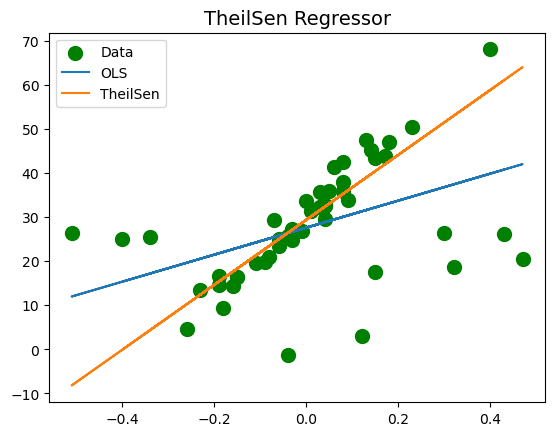

In [9]:
import numpy as np
from sklearn.linear_model import TheilSenRegressor
from sklearn import linear_model
import matplotlib.pyplot as plt

# sample data
X = np.array([ 0.15, -0.34, 0.32, 0.43, -0.4, -0.04, -0.51, 0.3, 0.47, 0.12, 0.08, 0.04, -0.08, 
              -0.23, 0.08, -0.03, 0.03, 0.04, 0.01, 0.06, 0.03, 0., -0.04, -0.18, -0.19, -0.06, 
              -0.26, -0.16, 0.13, 0.09, 0.03, -0.03, 0.04, 0.14, -0.01, 0.4, -0.06, 0.15, 0.08, 
              0.05, -0.15, -0.09, -0.15, -0.11, -0.07, -0.19, -0.06, 0.17, 0.23, 0.18]).reshape(-1, 1)
y = np.array([17.44, 25.46, 18.61, 26.07, 24.96, -1.22, 26.45, 26.5, 20.57, 3.08, 35.9 , 32.47, 
              20.84, 13.37, 42.44, 27.23, 35.65, 29.51, 31.28, 41.34, 32.19, 33.67, 25.64, 9.3, 
              14.63, 25.1, 4.69, 14.42, 47.53, 33.82, 32.2 , 24.81, 32.64, 45.11, 26.76, 68.01, 
              23.39, 43.49, 37.88, 36.01, 16.32, 19.77, 16.34, 19.57, 29.28, 16.62, 24.39, 43.77, 
              50.46, 47.09])

# fit and predict: Huber 
TS = TheilSenRegressor(n_subsamples=2).fit(X, y)   # 2 by default for 2D linear regression. 
                                                   # Increasing it will decrease robustness (not recommended)
y_pred_TS = TS.predict(X)

# retrieve the fitted parameters
coefs = TS.coef_
intercept = TS.intercept_

# TheilSen does not explicitly identify outliers from inliers.

print("TheilSen -----------------------------------\n")
print("Coefficients         :", coefs)
print("Intercept            :", intercept)
print("\n------------------------------------------")

# fit and predict: Ordinary Least Squares
ols = linear_model.LinearRegression().fit(X, y)
y_pred_ols = ols.predict(X)

# plot
plt.scatter(X, y, s=100, c='green', label='Data')
plt.title('TheilSen Regressor', fontsize=14)
plt.plot(X, y_pred_ols, label='OLS')
plt.plot(X, y_pred_TS, label='TheilSen')
plt.legend();

### 2.4. Summary

<div class="highlights" id="key1">
    <div class="highlights-title">1. RANSAC regressor</div>
    <div class="highlights-content"><a href="#RANSAC regressor" class="internal-link">Quick Scroll:</a> Identifies and excludes outliers prior to fitting the final model. The outliers are defined as the points with residuals that exceed the Median Absolute Deviation (MAD). It repeats random sampling and fitting a test model until enough inliers are detected.</div>
</div>

<div class="highlights" id="key2">
    <div class="highlights-title">2. Huber regressor</div>
    <div class="highlights-content"><a href="#Huber regressor" class="internal-link">Quick Scroll:</a> Detects outliers that exceed a certain threshold, and selectively apply different loss functions for outliers vs. inliers.</div>
</div>

<div class="highlights" id="key3">
    <div class="highlights-title">3. Theil-Sen regressor</div>
    <div class="highlights-content"><a href="#Theil-Sen regressor" class="internal-link">Quick Scroll:</a> Fits OLS on all possible combinations of points (each of size 2 by default) and returns their spatial median slope and intercept as the final parameters.</div>
</div>

In the order of robustness:  RANSAC > Theil-Sen > Huber.

RANSAC shows the best robustness because it identifies and excludes outliers prior to fitting the final model, whereas the other two attempts to *dampen* the effect of outliers instead of excluding them. When in doubt, use RANSAC. However, when reporting a result obtained with RANSAC, make sure to fix the random seed <code>RANSACRegressor(random_state=3)</code>, as explained <a href="#warning-RANSAC" class="internal-link">above</a>.

## 3. Extension to 3D+ multivariate linear regressions

All three of the robust models are applicable to 3D or more n-dimensional regressions. Below is the simple code snippet for multivariate linear regression with 2 features and an intercept.

In [2]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression, RANSACRegressor, HuberRegressor, TheilSenRegressor

# generate sample data
X, y, coef = datasets.make_regression(
    n_samples=50, n_features=2, n_informative=1, noise=10, coef=True, random_state=0,
)

# Ordinary Least Squares
ols = linear_model.LinearRegression().fit(X, y)
y_pred_ols = ols.predict(X)

# RANSAC
ransac = RANSACRegressor(random_state=1).fit(X, y)
y_pred_ransac = ransac.predict(X)

# Huber
huber = HuberRegressor().fit(X, y)
y_pred_huber = huber.predict(X)

# TheilSen
TS = TheilSenRegressor().fit(X, y)
y_pred_TS = TS.predict(X)

print("OLS --------------------------------------")
print("Coefficients         :", np.round(ols.coef_, 2))
print("Intercept            :", np.round(ols.intercept_, 2))
print()
print("RANSAC -----------------------------------")
print("Coefficients         :", np.round(ransac.estimator_.coef_, 2))
print("Intercept            :", np.round(ransac.estimator_.intercept_, 2))
print()
print("Huber ------------------------------------")
print("Coefficients         :", np.round(huber.coef_, 2))
print("Intercept            :", np.round(huber.intercept_, 2))
print()
print("TheilSen ---------------------------------")
print("Coefficients         :", np.round(TS.coef_, 2))
print("Intercept            :", np.round(TS.intercept_, 2))
print("------------------------------------------")
print()

OLS --------------------------------------
Coefficients         : [43.07  1.73]
Intercept            : 1.41

RANSAC -----------------------------------
Coefficients         : [42.62  1.11]
Intercept            : 2.08

Huber ------------------------------------
Coefficients         : [43.13  2.07]
Intercept            : 1.23

TheilSen ---------------------------------
Coefficients         : [42.15  2.95]
Intercept            : 0.71
------------------------------------------



### 3.1. Visual demonstrations

(*Note that for models with more than 3D features, including intercept, they can't be visualized but the idea of robust regression still extends beyond 3D Cartesian space.*)

For demonstrations, a 3D sample data set of 200 points is generated from the true model: $y = 200 x_{1} + 28x_{2} + 300$. Random Gaussian noise is added to the $y$ values to emulate the randomness and variability present in real-life data. Currently, the dataset is free of outliers. Fitting an OLS regression results in <a href="#fig-20" class="internal-link">Figure 20</a>:

<div class="row" style="" id="fig-20">
<div class="col"><img src="jupyter_images/OLS_3d_free.png"></div>
<div class="col-12"><p class="image-description"><strong>Figure 20:</strong> This illustration presents the 3D linear model alongside the dataset within a 3D Cartesian space. When an OLS model is applied to this dataset, it closely approximates the true model parameters, particularly in scenarios devoid of outliers. The middle plot highlights how the data points are closely aligned with the 3D model fit (illustrated as a blue plane).</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (20)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import (LinearRegression, HuberRegressor,
                              	RANSACRegressor, TheilSenRegressor)

###################################### Sample Data Generation ###################################
 
np.random.seed(0)   # for reproducibility

num_samples = 200  

# Porosity
x1_min, x1_max = 5, 15
mean_x1 = (x1_min + x1_max) / 2  
std_dev_x1 = (x1_max - x1_min) / 4 
x1 = np.random.normal(mean_x1, std_dev_x1, num_samples)

# Brittleness
x2_min, x2_max = 20, 85
mean_x2 = (x2_min + x2_max) / 2 
std_dev_x2 = (x2_max - x2_min) / 4  
x2 = np.random.normal(mean_x2, std_dev_x2, num_samples)  

# Reshape X for comptibility with regression models
X = np.vstack((x1, x2)).T

# True model
Y = 200* x1 + 28 * x2 + 300

# Add Gaussian noise to Y
noise = np.random.normal(0, 200, num_samples)  # Mean = 0, Standard deviation = 50
Y = Y + noise

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0, 25, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

model = LinearRegression()
model.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel(r'$X_{1}$', fontsize=12)
    ax.set_ylabel(r'$X_{2}$', fontsize=12)
    ax.set_zlabel('Y', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    ax.set_xlim(0, 25)
    ax.set_ylim(100, 0)
    ax.set_zlim(0, 8000)
    

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.5, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=30, azim=50)
ax2.view_init(elev=2, azim=60)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold(' OLS 3D Linear Regression (without outliers), ')
plain_txt = r'fitted model:   $y = $ %.1f$x_{1}$ + %.1f$x_{2}$ + %.1f' % (model.coef_[0], model.coef_[1], model.intercept_)
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=16, y=1.03)
yloc = 0.95
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

fig.text(0.48, 0.8, 'true model:   $y = $ 200$x_{1}$ + 28$x_{2}$ + 300', ha='center', va='center', fontsize=16, color='grey');
            </code>
        </pre>
    </div>
</div>

Now we will introduce 20 outlier points, constituting 10% of the original dataset, and reapply the OLS regression, as depicted in <a href="#fig-21" class="internal-link">Figure 21</a>. It is noticeable that the OLS parameters fitted in this scenario exhibit a more significant deviation from the population parameters compared to the initial fit that lacked outliers.

<div class="row" style="" id="fig-21">
<div class="col"><img src="jupyter_images/OLS_3d.png"></div>
<div class="col-12"><p class="image-description"><strong>Figure 21:</strong> This figure highlights outlier points in red. The introduction of these outliers has caused a noticeable shift in the fitted blue plane, which is now skewed towards these outliers, affecting the accuracy of the model fit. The left plot distinctly shows the misalignment of the model plane with the main dataset. For a comparative analysis, refer to the visual and numerical parameters in <a href="#fig-20" class="internal-link">Figure 20</a>.</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (21)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

###################################### Sample Data Generation ###################################
 
np.random.seed(0)   # for reproducibility

num_samples = 200  

# Porosity
x1_min, x1_max = 5, 15
mean_x1 = (x1_min + x1_max) / 2  
std_dev_x1 = (x1_max - x1_min) / 4 
x1 = np.random.normal(mean_x1, std_dev_x1, num_samples)

# Brittleness
x2_min, x2_max = 20, 85
mean_x2 = (x2_min + x2_max) / 2 
std_dev_x2 = (x2_max - x2_min) / 4  
x2 = np.random.normal(mean_x2, std_dev_x2, num_samples)  

# Reshape X for comptibility with regression models
X = np.vstack((x1, x2)).T

# True model
Y = 200* x1 + 28 * x2 + 300

# Add Gaussian noise to Y
noise = np.random.normal(0, 200, num_samples)  # Mean = 0, Standard deviation = 50
Y_noisy = Y + noise

# Add outliers
num_outliers = int(0.1 * num_samples)                    # define 5% of data to be outliers
outlier_x1 = np.random.uniform(10, 12, num_outliers)     # outlier between range 10 ~ 12
outlier_x2 = np.random.uniform(0, 5, num_outliers)       # outlier between range 0 ~ 5
outlier_Y = np.random.uniform(6500, 7000, num_outliers)  # outlier between range 6500 ~ 7000
X_outliers = np.vstack((outlier_x1, outlier_x2)).T

# Append outliers to the original data
X = np.vstack((X, X_outliers))
Y = np.append(Y_noisy, outlier_Y)

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0, 25, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

model = LinearRegression()
model.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.plot(X_outliers[:, 0], X_outliers[:, 1], outlier_Y, color='r', zorder=15, linestyle='none', marker='x', alpha=1, markersize=10)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel(r'$X_{1}$', fontsize=12)
    ax.set_ylabel(r'$X_{2}$', fontsize=12)
    ax.set_zlabel('Y', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    ax.set_xlim(0, 25)
    ax.set_ylim(100, 0)
    ax.set_zlim(0, 8000)
    

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.5, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=30, azim=50)
ax2.view_init(elev=2, azim=60)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold(' OLS 3D Linear Regression (with outliers), ')
plain_txt = r'fitted model:   $y = $ %.1f$x_{1}$ + %.1f$x_{2}$ + %.1f' % (model.coef_[0], model.coef_[1], model.intercept_)
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=16, y=1.03)
yloc = 0.95
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

fig.text(0.48, 0.8, 'true model:   $y = $ 200$x_{1}$ + 28$x_{2}$ + 300', ha='center', va='center', fontsize=16, color='grey');
            </code>
        </pre>
    </div>
</div>

The below three figures (<a href="#fig-22" class="internal-link">Figure 22</a>, <a href="#fig-23" class="internal-link">Figure 23</a> and <a href="#fig-24" class="internal-link">Figure 24</a>) presents 3D model fits and visualizations for the three robust models: RANSAC, Huber, and TheilSen.

<div class="row" style="" id="fig-22">
<div class="col"><img src="jupyter_images/ransac_3d.png"></div>
<div class="col-12"><p class="image-description"><strong>Figure 22:</strong> RANSAC robust linear regression on 3D dataset with outliers.</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (22)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import RANSACRegressor

###################################### Sample Data Generation ###################################
 
np.random.seed(0)   # for reproducibility

num_samples = 200  

# Porosity
x1_min, x1_max = 5, 15
mean_x1 = (x1_min + x1_max) / 2  
std_dev_x1 = (x1_max - x1_min) / 4 
x1 = np.random.normal(mean_x1, std_dev_x1, num_samples)

# Brittleness
x2_min, x2_max = 20, 85
mean_x2 = (x2_min + x2_max) / 2 
std_dev_x2 = (x2_max - x2_min) / 4  
x2 = np.random.normal(mean_x2, std_dev_x2, num_samples)  

# Reshape X for comptibility with regression models
X = np.vstack((x1, x2)).T

# True model
Y = 200* x1 + 28 * x2 + 300

# Add Gaussian noise to Y
noise = np.random.normal(0, 200, num_samples)  # Mean = 0, Standard deviation = 50
Y_noisy = Y + noise

# Add outliers
num_outliers = int(0.1 * num_samples)                    # define 5% of data to be outliers
outlier_x1 = np.random.uniform(10, 12, num_outliers)     # outlier between range 10 ~ 12
outlier_x2 = np.random.uniform(0, 5, num_outliers)       # outlier between range 0 ~ 5
outlier_Y = np.random.uniform(6500, 7000, num_outliers)  # outlier between range 6500 ~ 7000
X_outliers = np.vstack((outlier_x1, outlier_x2)).T

# Append outliers to the original data
X = np.vstack((X, X_outliers))
Y = np.append(Y_noisy, outlier_Y)

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0, 25, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

model = RANSACRegressor()
model.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.plot(X_outliers[:, 0], X_outliers[:, 1], outlier_Y, color='r', zorder=15, linestyle='none', marker='x', alpha=1, markersize=10)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel(r'$X_{1}$', fontsize=12)
    ax.set_ylabel(r'$X_{2}$', fontsize=12)
    ax.set_zlabel('Y', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    ax.set_xlim(0, 25)
    ax.set_ylim(100, 0)
    ax.set_zlim(0, 8000)
    

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.5, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=30, azim=50)
ax2.view_init(elev=2, azim=60)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold(' RANSAC 3D Linear Regression, ')
plain_txt = r'fitted model:   $y = $ %.1f$x_{1}$ + %.1f$x_{2}$ + %.1f' % (
    model.estimator_.coef_[0], model.estimator_.coef_[1], model.estimator_.intercept_
)
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=16, y=1.03)
yloc = 0.95
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

fig.text(0.48, 0.8, 'true model:   $y = $ 200$x_{1}$ + 28$x_{2}$ + 300', ha='center', va='center', fontsize=16, color='grey');
            </code>
        </pre>
    </div>
</div>

<div class="row" style="" id="fig-23">
<div class="col"><img src="jupyter_images/huber_3d.png"></div>
<div class="col-12"><p class="image-description"><strong>Figure 23:</strong> Huber robust linear regression on 3D dataset with outliers.</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (23)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import HuberRegressor

###################################### Sample Data Generation ###################################
 
np.random.seed(0)   # for reproducibility

num_samples = 200  

# Porosity
x1_min, x1_max = 5, 15
mean_x1 = (x1_min + x1_max) / 2  
std_dev_x1 = (x1_max - x1_min) / 4 
x1 = np.random.normal(mean_x1, std_dev_x1, num_samples)

# Brittleness
x2_min, x2_max = 20, 85
mean_x2 = (x2_min + x2_max) / 2 
std_dev_x2 = (x2_max - x2_min) / 4  
x2 = np.random.normal(mean_x2, std_dev_x2, num_samples)  

# Reshape X for comptibility with regression models
X = np.vstack((x1, x2)).T

# True model
Y = 200* x1 + 28 * x2 + 300

# Add Gaussian noise to Y
noise = np.random.normal(0, 200, num_samples)  # Mean = 0, Standard deviation = 50
Y_noisy = Y + noise

# Add outliers
num_outliers = int(0.1 * num_samples)                    # define 5% of data to be outliers
outlier_x1 = np.random.uniform(10, 12, num_outliers)     # outlier between range 10 ~ 12
outlier_x2 = np.random.uniform(0, 5, num_outliers)       # outlier between range 0 ~ 5
outlier_Y = np.random.uniform(6500, 7000, num_outliers)  # outlier between range 6500 ~ 7000
X_outliers = np.vstack((outlier_x1, outlier_x2)).T

# Append outliers to the original data
X = np.vstack((X, X_outliers))
Y = np.append(Y_noisy, outlier_Y)

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0, 25, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

model = HuberRegressor()
model.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.plot(X_outliers[:, 0], X_outliers[:, 1], outlier_Y, color='r', zorder=15, linestyle='none', marker='x', alpha=1, markersize=10)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel(r'$X_{1}$', fontsize=12)
    ax.set_ylabel(r'$X_{2}$', fontsize=12)
    ax.set_zlabel('Y', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    ax.set_xlim(0, 25)
    ax.set_ylim(100, 0)
    ax.set_zlim(0, 8000)
    

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.5, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=30, azim=50)
ax2.view_init(elev=2, azim=60)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold(' Huber 3D Linear Regression, ')
plain_txt = r'fitted model:   $y = $ %.1f$x_{1}$ + %.1f$x_{2}$ + %.1f' % (model.coef_[0], model.coef_[1], model.intercept_)
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=16, y=1.03)
yloc = 0.95
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

fig.text(0.48, 0.8, 'true model:   $y = $ 200$x_{1}$ + 28$x_{2}$ + 300', ha='center', va='center', fontsize=16, color='grey');            </code>
        </pre>
    </div>
</div>

<div class="row" style="" id="fig-24">
<div class="col"><img src="jupyter_images/TS_3d.png"></div>
<div class="col-12"><p class="image-description"><strong>Figure 24:</strong> TheilSen robust linear regression on 3D dataset with outliers.</p></div>
</div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (24)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import TheilSenRegressor

###################################### Sample Data Generation ###################################
 
np.random.seed(0)   # for reproducibility

num_samples = 200  

# Porosity
x1_min, x1_max = 5, 15
mean_x1 = (x1_min + x1_max) / 2  
std_dev_x1 = (x1_max - x1_min) / 4 
x1 = np.random.normal(mean_x1, std_dev_x1, num_samples)

# Brittleness
x2_min, x2_max = 20, 85
mean_x2 = (x2_min + x2_max) / 2 
std_dev_x2 = (x2_max - x2_min) / 4  
x2 = np.random.normal(mean_x2, std_dev_x2, num_samples)  

# Reshape X for comptibility with regression models
X = np.vstack((x1, x2)).T

# True model
Y = 200* x1 + 28 * x2 + 300

# Add Gaussian noise to Y
noise = np.random.normal(0, 200, num_samples)  # Mean = 0, Standard deviation = 50
Y_noisy = Y + noise

# Add outliers
num_outliers = int(0.1 * num_samples)                    # define 5% of data to be outliers
outlier_x1 = np.random.uniform(10, 12, num_outliers)     # outlier between range 10 ~ 12
outlier_x2 = np.random.uniform(0, 5, num_outliers)       # outlier between range 0 ~ 5
outlier_Y = np.random.uniform(6500, 7000, num_outliers)  # outlier between range 6500 ~ 7000
X_outliers = np.vstack((outlier_x1, outlier_x2)).T

# Append outliers to the original data
X = np.vstack((X, X_outliers))
Y = np.append(Y_noisy, outlier_Y)

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0, 25, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

model = TheilSenRegressor()
model.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.plot(X_outliers[:, 0], X_outliers[:, 1], outlier_Y, color='r', zorder=15, linestyle='none', marker='x', alpha=1, markersize=10)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel(r'$X_{1}$', fontsize=12)
    ax.set_ylabel(r'$X_{2}$', fontsize=12)
    ax.set_zlabel('Y', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    ax.set_xlim(0, 25)
    ax.set_ylim(100, 0)
    ax.set_zlim(0, 8000)
    

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.5, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=30, azim=50)
ax2.view_init(elev=2, azim=60)
ax3.view_init(elev=60, azim=165)

fig.tight_layout()

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold(' TheilSen 3D Linear Regression, ')
plain_txt = r'fitted model:   $y = $ %.1f$x_{1}$ + %.1f$x_{2}$ + %.1f' % (model.coef_[0], model.coef_[1], model.intercept_)
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=16, y=1.03)
yloc = 0.95
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

fig.text(0.48, 0.8, 'true model:   $y = $ 200$x_{1}$ + 28$x_{2}$ + 300', ha='center', va='center', fontsize=16, color='grey');
            </code>
        </pre>
    </div>
</div>